# HR Attrition Analysis

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import seaborn as sns

In [105]:
import warnings
warnings.filterwarnings('ignore')

In [106]:
HR_data = pd.read_csv('https://raw.githubusercontent.com/enlitedata/Evaluation-Data/main/WA_Fn-UseC_-HR-Employee-Attrition.csv')
HR_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [107]:
HR_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


The given dataset is relatively clean, a small data cleaning will be required.

In [108]:
HR_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [109]:
HR_data.Age.describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

In [110]:
HR_data.Education.replace({1 : "Below College",
                       2 : "College",
                       3 : "Bachelors", 
                       4 : "Masters", 
                       5 : "PhD"}, inplace = True)

In [111]:
for col in HR_data.columns:
    print(col)

Age
Attrition
BusinessTravel
DailyRate
Department
DistanceFromHome
Education
EducationField
EmployeeCount
EmployeeNumber
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobRole
JobSatisfaction
MaritalStatus
MonthlyIncome
MonthlyRate
NumCompaniesWorked
Over18
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StandardHours
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


# creating a new dataframe on wanted data to analyze.

In [112]:
NEW_data = HR_data[["Age",
                        "Attrition",
                        "BusinessTravel",
                        "Department",
                        "DistanceFromHome",
                        "Education",
                        "EducationField",
                        "OverTime",
                        "Gender",
                        "JobInvolvement",
                        "JobRole",
                        "JobSatisfaction",
                        "MonthlyIncome",
                        "PerformanceRating",
                        "YearsAtCompany",
                        "YearsInCurrentRole",
                        "YearsSinceLastPromotion"]]

In [113]:
NEW_data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,OverTime,Gender,JobInvolvement,JobRole,JobSatisfaction,MonthlyIncome,PerformanceRating,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,41,Yes,Travel_Rarely,Sales,1,College,Life Sciences,Yes,Female,3,Sales Executive,4,5993,3,6,4,0
1,49,No,Travel_Frequently,Research & Development,8,Below College,Life Sciences,No,Male,2,Research Scientist,2,5130,4,10,7,1
2,37,Yes,Travel_Rarely,Research & Development,2,College,Other,Yes,Male,2,Laboratory Technician,3,2090,3,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,Masters,Life Sciences,Yes,Female,3,Research Scientist,3,2909,3,8,7,3
4,27,No,Travel_Rarely,Research & Development,2,Below College,Medical,No,Male,3,Laboratory Technician,2,3468,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,Research & Development,23,College,Medical,No,Male,4,Laboratory Technician,4,2571,3,5,2,0
1466,39,No,Travel_Rarely,Research & Development,6,Below College,Medical,No,Male,2,Healthcare Representative,1,9991,3,7,7,1
1467,27,No,Travel_Rarely,Research & Development,4,Bachelors,Life Sciences,Yes,Male,4,Manufacturing Director,2,6142,4,6,2,0
1468,49,No,Travel_Frequently,Sales,2,Bachelors,Medical,No,Male,2,Sales Executive,2,5390,3,9,6,0


In [114]:
NEW_data.shape

(1470, 17)

In [115]:
NEW_data.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
OverTime                   0
Gender                     0
JobInvolvement             0
JobRole                    0
JobSatisfaction            0
MonthlyIncome              0
PerformanceRating          0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
dtype: int64

In [116]:
names = ["JobInvolvement", "JobSatisfaction", "PerformanceRating"]

for name in names:
    NEW_data[name].replace({1 : "Low",
                                    2 : "Medium",
                                    3 : "High",
                                    4 : "Very High"}, inplace = True)

In [117]:
for col in NEW_data:
    cardinality = len(pd.Index(NEW_data[col]).value_counts())
    print(NEW_data[col].name + ": " + str(cardinality))

Age: 43
Attrition: 2
BusinessTravel: 3
Department: 3
DistanceFromHome: 29
Education: 5
EducationField: 6
OverTime: 2
Gender: 2
JobInvolvement: 4
JobRole: 9
JobSatisfaction: 4
MonthlyIncome: 1349
PerformanceRating: 2
YearsAtCompany: 37
YearsInCurrentRole: 19
YearsSinceLastPromotion: 16


Checking disparties by pay between gender

Text(0.5, 1.0, 'Monthly Income by Gender')

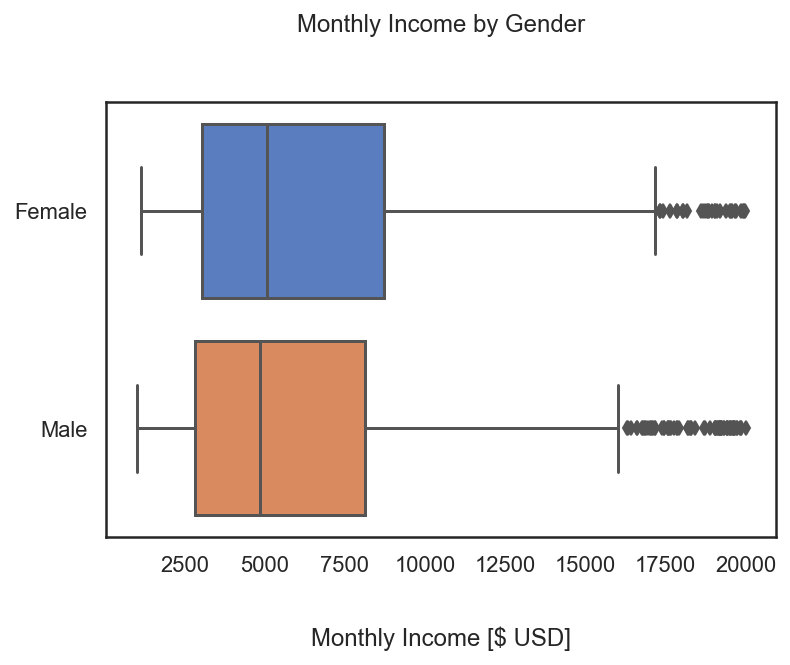

In [118]:
ax = sns.boxplot(data = NEW_data,
           y = "Gender",
           x = "MonthlyIncome",
           palette = "muted")

ax.set_xlabel("Monthly Income [$ USD]", labelpad = 25)
ax.set_ylabel(None)
ax.set_title("Monthly Income by Gender", pad = 35)

Text(45, 110, 'Average age is 37 years')

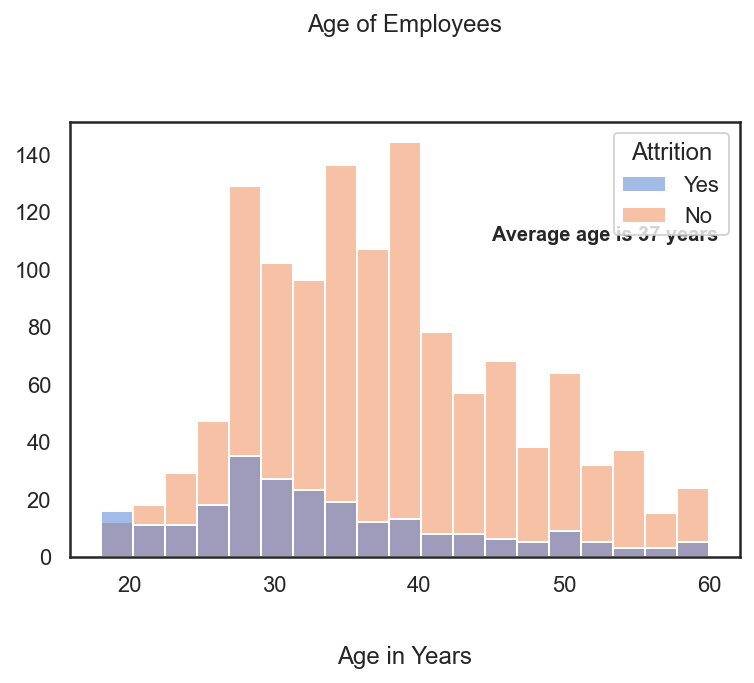

In [119]:
ax = sns.histplot(data = NEW_data,
            x = "Age",
            hue = "Attrition",
            palette = "muted")

ax.set_title("Age of Employees", pad = 45)
ax.set_ylabel(None)
ax.set_xlabel("Age in Years", labelpad = 25)

plt.text(x = 45, y = 110, s =  "Average age is 37 years", fontweight = 'semibold')


by observing the above graph, the employee who leave the company are under 40 years old.


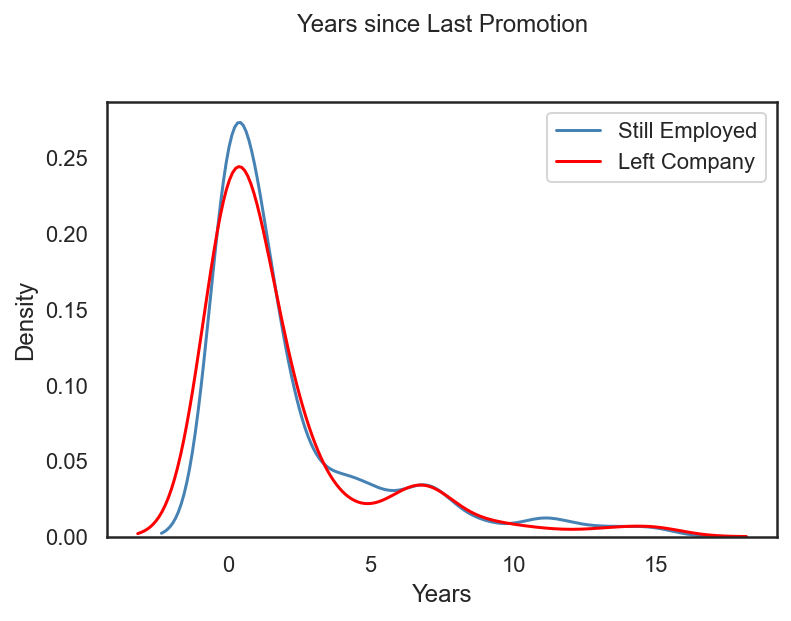

In [120]:
ax = sns.kdeplot(x = NEW_data.loc[NEW_data.Attrition == "No"].YearsSinceLastPromotion, label = "Still Employed", color = "steelblue")
ax = sns.kdeplot(x = NEW_data.loc[NEW_data.Attrition == "Yes"].YearsSinceLastPromotion, label = "Left Company", color = "red")
ax.set_title("Years since Last Promotion", pad = 35)
ax.set_xlabel("Years")
ax.legend()

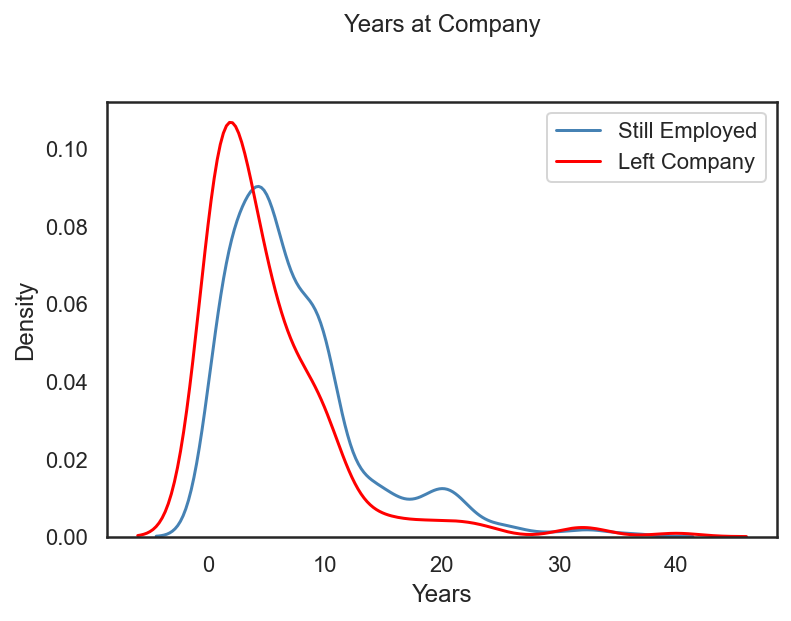

In [121]:
ax = sns.kdeplot(x = NEW_data.loc[NEW_data.Attrition == "No"].YearsAtCompany, label = "Still Employed", color = "steelblue")
ax = sns.kdeplot(x = NEW_data.loc[NEW_data.Attrition == "Yes"].YearsAtCompany, label = "Left Company", color = "red")
ax.set_title("Years at Company", pad = 35)
ax.set_xlabel("Years")
ax.legend()

By above graph Employee who leave company don't seem to spend a long time with the company.

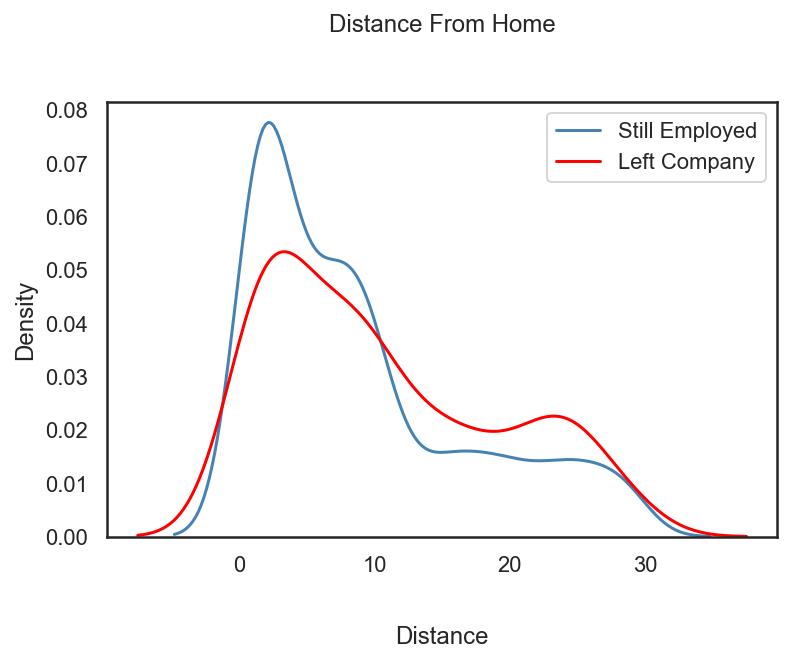

In [122]:
ax = sns.kdeplot(x = NEW_data.loc[NEW_data.Attrition == "No"].DistanceFromHome, label = "Still Employed", color = "steelblue")
ax = sns.kdeplot(x = NEW_data.loc[NEW_data.Attrition == "Yes"].DistanceFromHome, label = "Left Company", color = "red")
ax.set_title("Distance From Home", pad = 35)
ax.set_xlabel("Distance", labelpad = 25)
ax.legend()

Interestingly, employees who commute a longer distance to work seem to contribute a large amount to attrition. This is a likely reason for attrition.

In [123]:
def plot_stats(column, title, label):
    
    fig, ax = plt.subplots(1,2, figsize = (20, 9))

    sns.countplot(ax = ax[0], 
                 data = NEW_data.loc[NEW_data.Attrition == "Yes"],
                 x = column,
                 order = ['Low', 'Medium', 'High', 'Very High'])

    sns.countplot(ax = ax[1], 
                 data = NEW_data.loc[NEW_data.Attrition == "No"],
                 x = column,
                 order = ['Low', 'Medium', 'High', 'Very High'])

    fig.suptitle(title, fontsize = 25, y = 1.05)
    ax[0].set_title("Left Company", pad = 35)
    ax[1].set_title("Still Employed", pad = 35)

    for i in [0,1]:
        ax[i].set_ylabel(None)
        ax[i].set_xlabel(label, labelpad = 20)

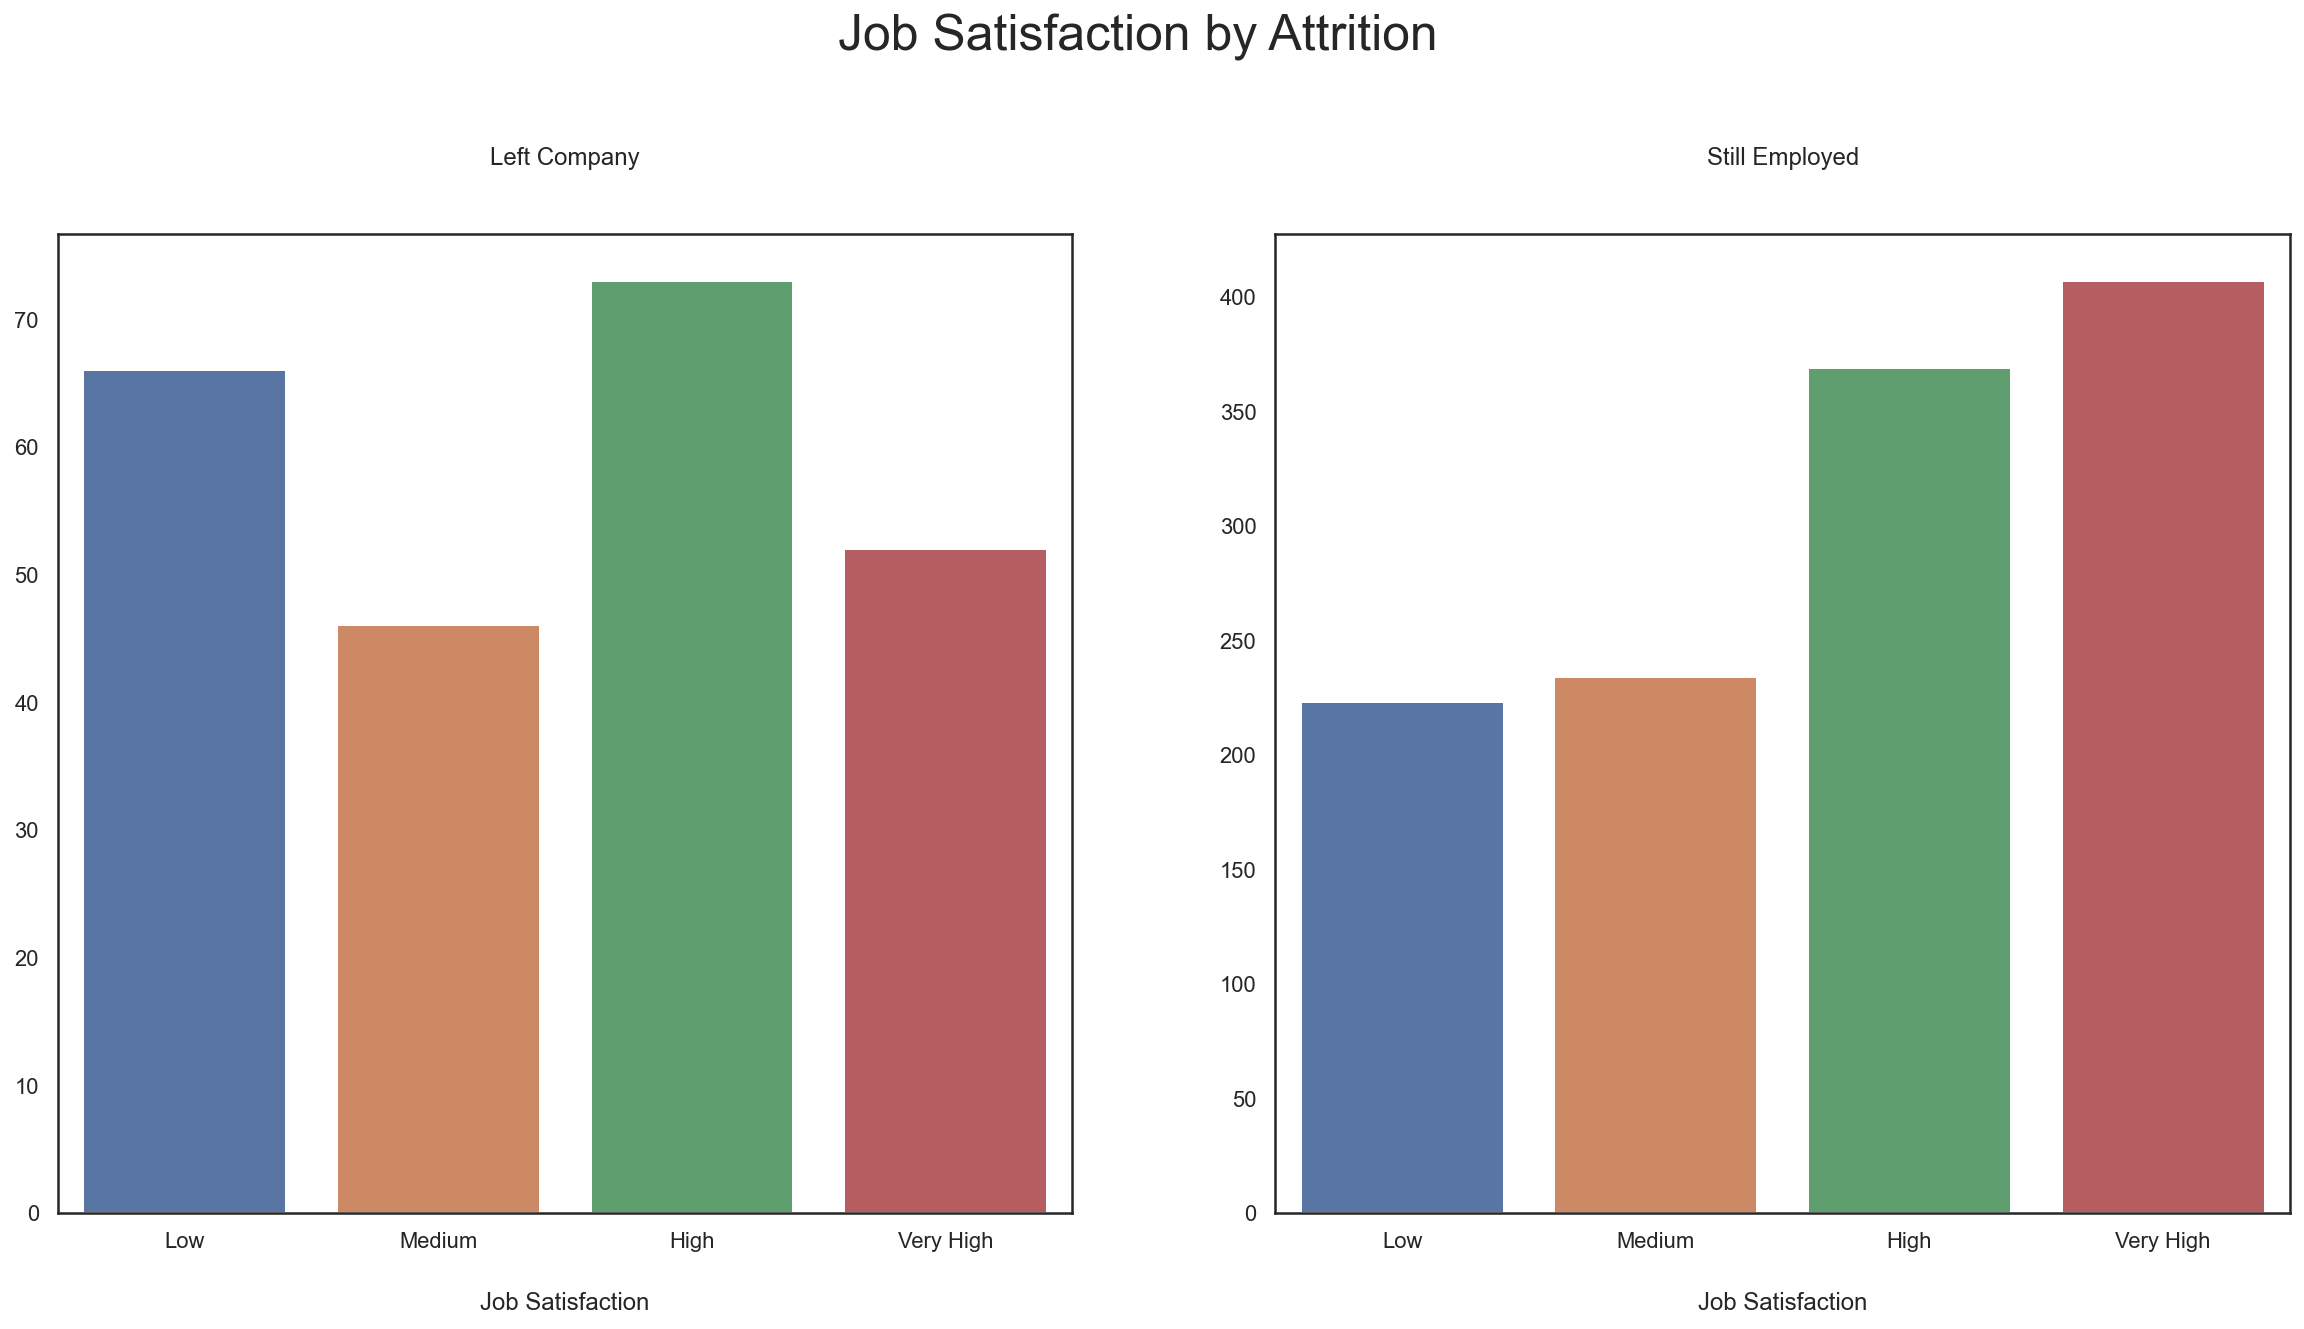

In [124]:
plot_stats("JobSatisfaction", "Job Satisfaction by Attrition", "Job Satisfaction")

As expected, employees who report low Job satisfaction contribute to attrition. However we see the most amount of attrition from employees who report a high level of Job satisfaction.

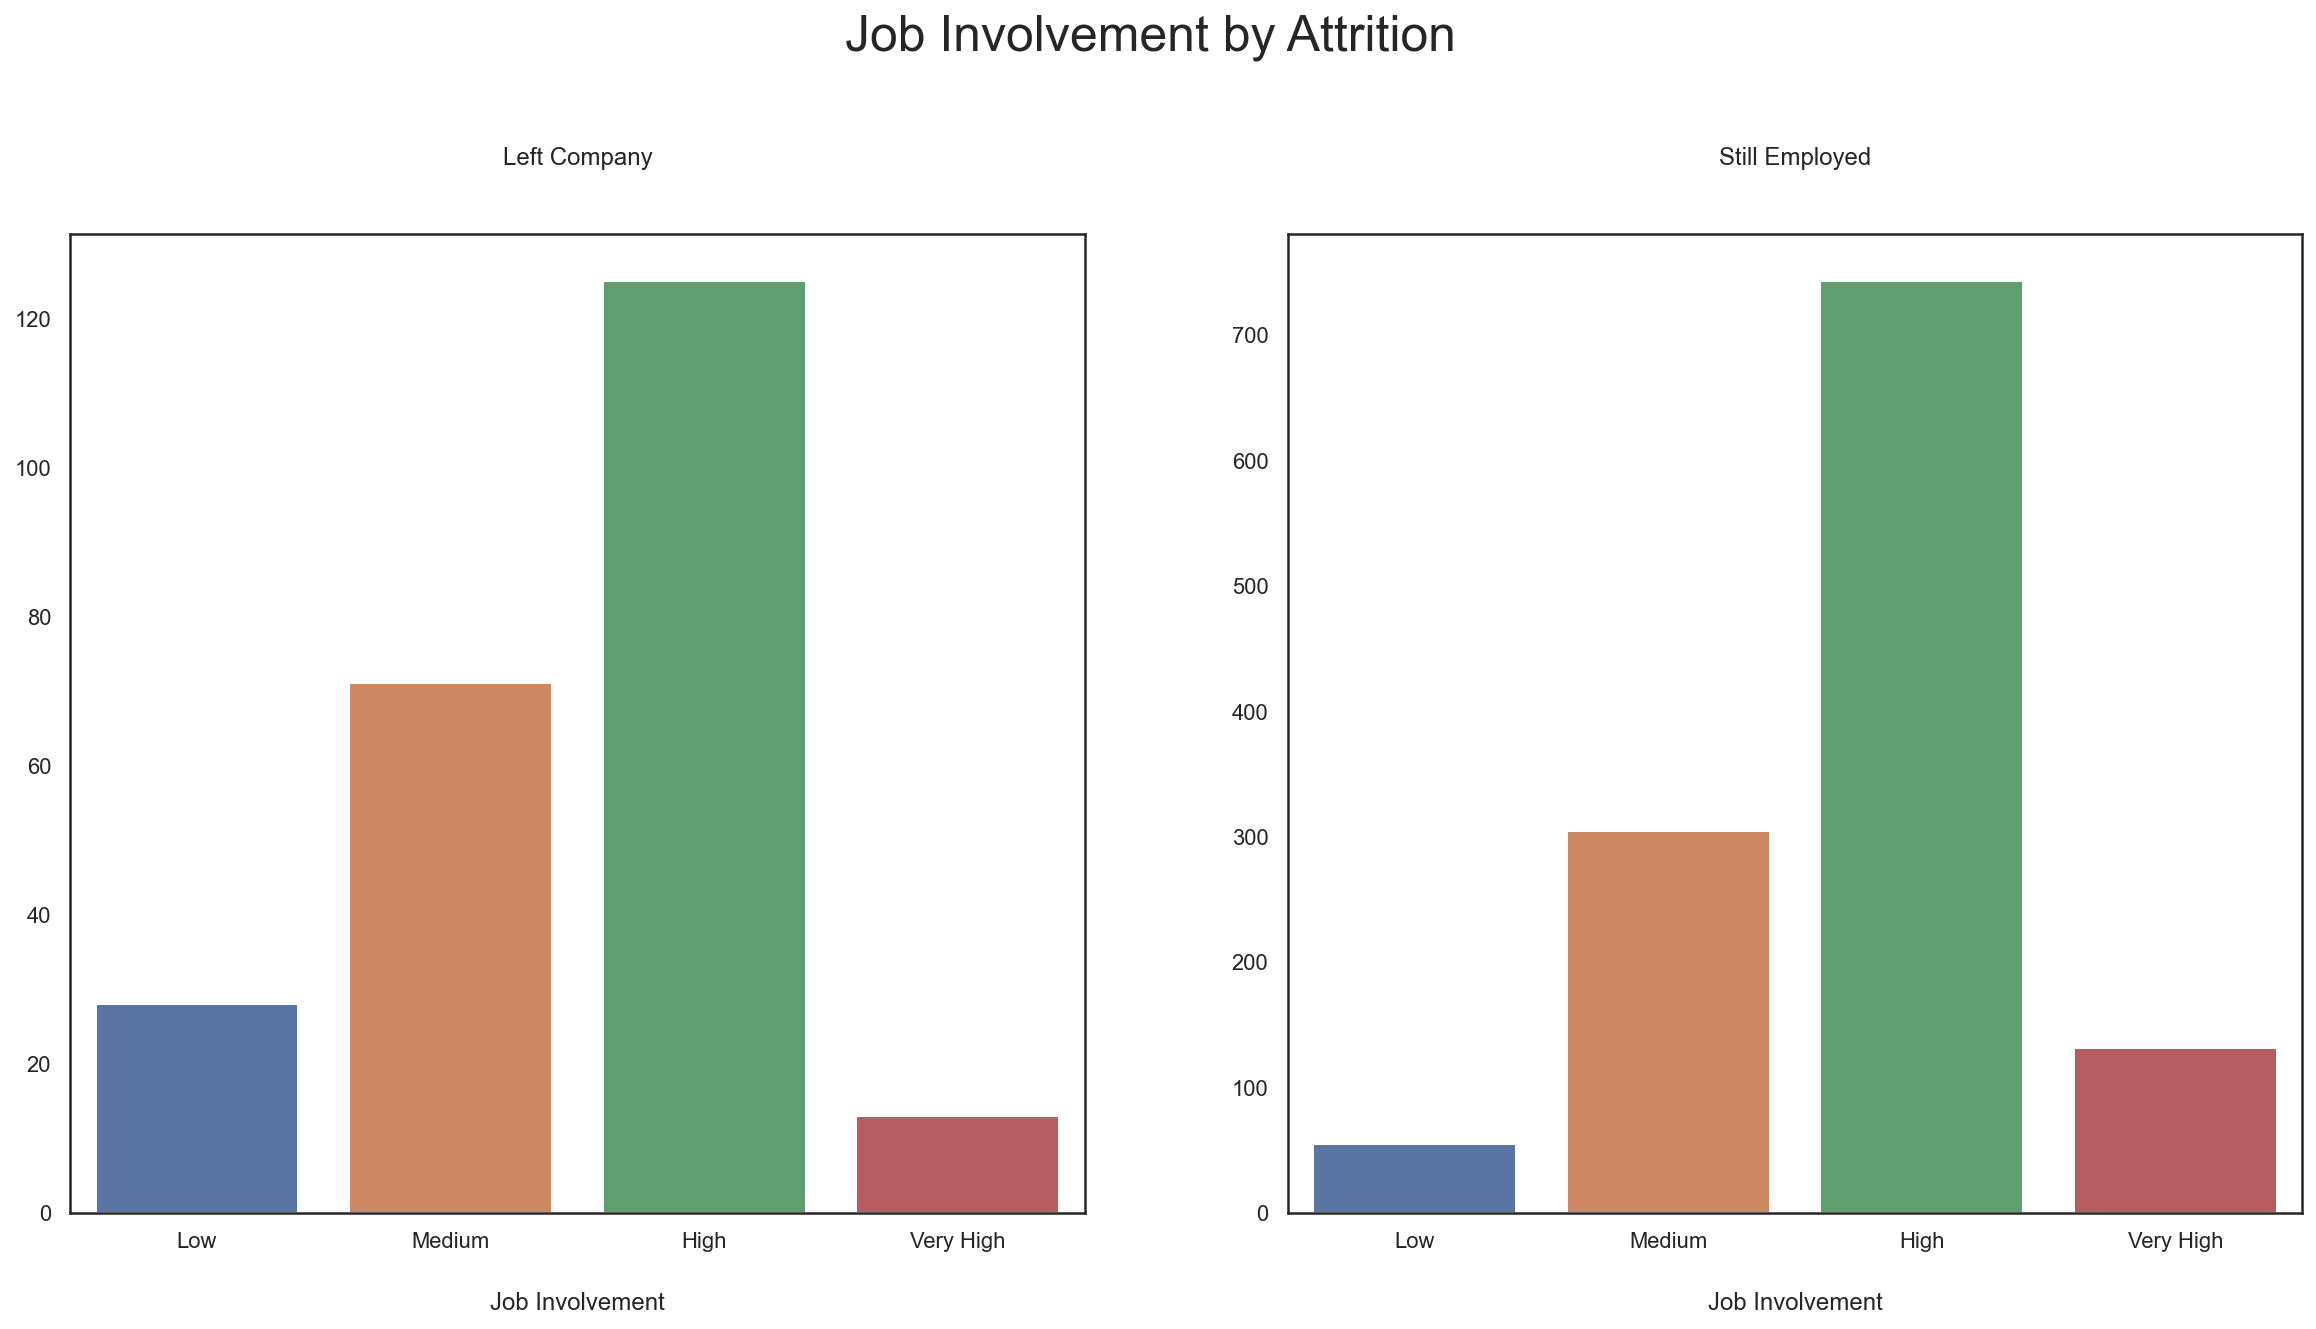

In [125]:
plot_stats("JobInvolvement", "Job Involvement by Attrition", "Job Involvement")

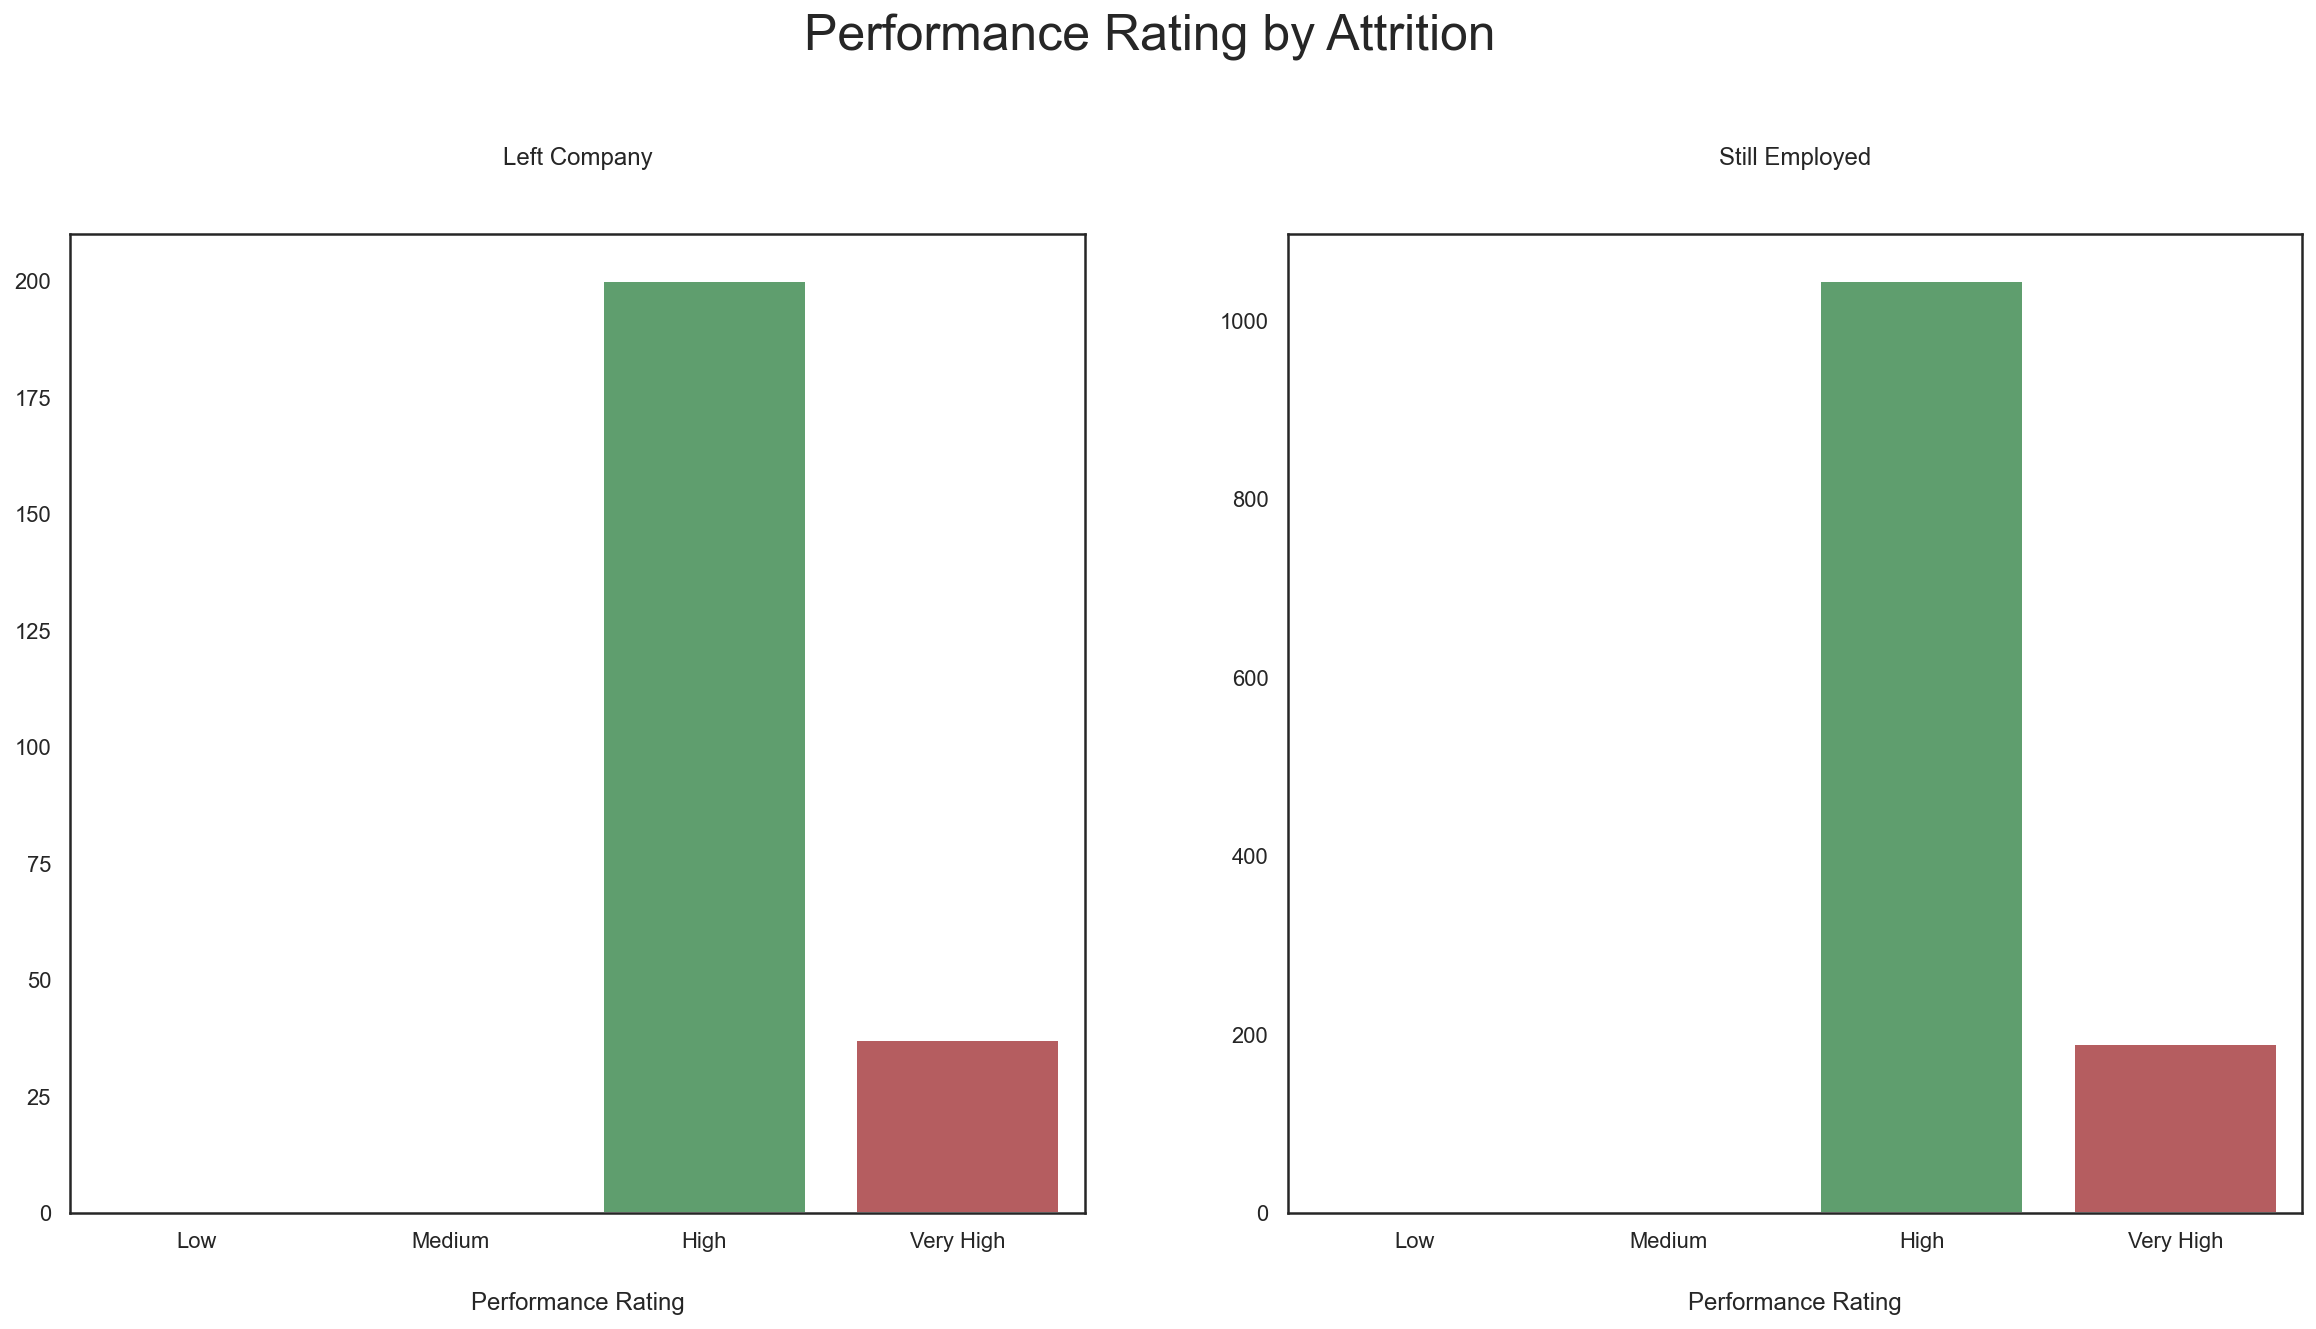

In [126]:
plot_stats("PerformanceRating", "Performance Rating by Attrition", "Performance Rating")

Text(1.78, 100, '19.05% Attrition')

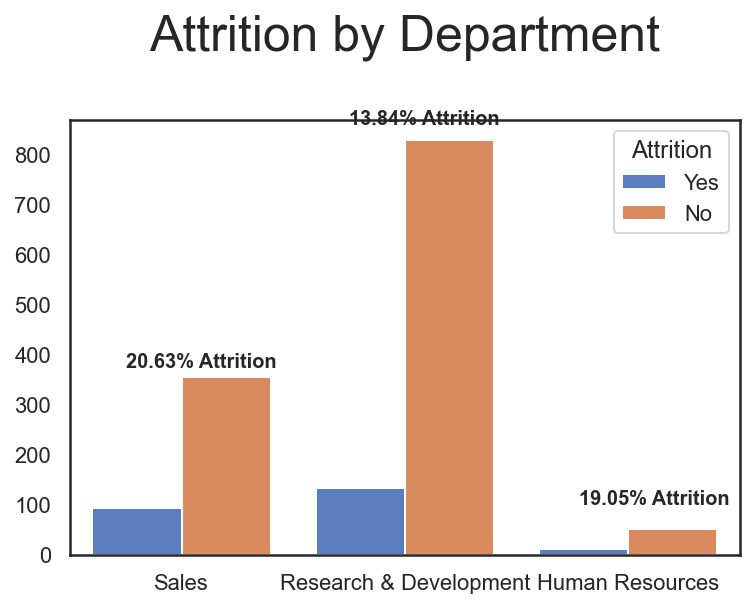

In [127]:
ax = sns.countplot(data = NEW_data,
                  x = "Department",
                  hue = "Attrition",
                  palette = "muted")


ax.set_title("Attrition by Department", fontsize = 25, pad = 35)
ax.set_xlabel(None)
ax.set_ylabel(None)

def percent_attrition(column, label):
    column_df = NEW_data.loc[NEW_data[column] == label]
    index  = column_df.index
    att_df = column_df.loc[column_df.Attrition == "Yes"]
    att_index = att_df.index
    return (len(att_index) / len(index)) * 100
    
sales_str = np.str(np.round(percent_attrition("Department","Sales"),2)) + '% Attrition'
plt.text(x = -0.25 , y = 375, s = sales_str, fontweight = 'semibold')

RD_str = np.str(np.round(percent_attrition("Department", "Research & Development"),2)) + '% Attrition'
plt.text(x = 0.75 , y = 860, s = RD_str, fontweight = 'semibold')

HR_str = np.str(np.round(percent_attrition("Department", "Human Resources"),2)) + '% Attrition'
plt.text(x = 1.78 , y = 100, s = HR_str, fontweight = 'semibold')

by seeing above graph , the Sales department has the largest percentage of attrition.

Text(0.85, 760, '17.0% Attrition')

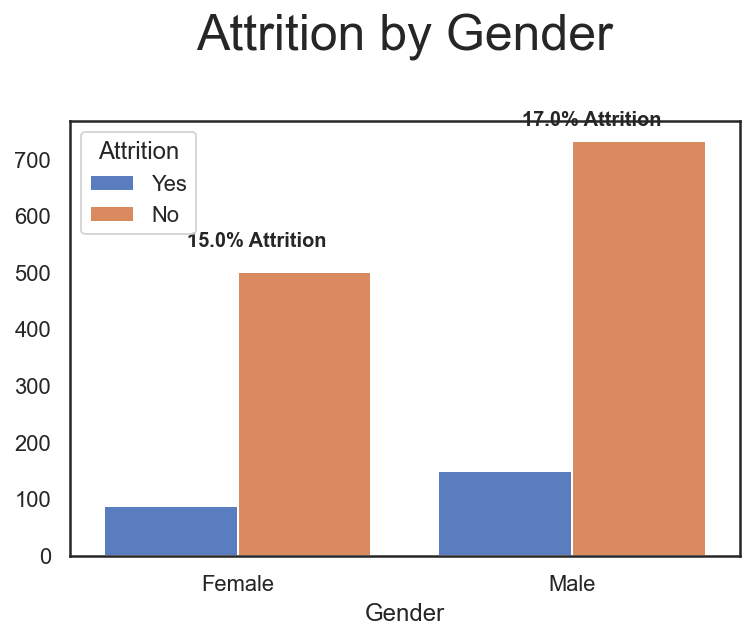

In [128]:
ax = sns.countplot(data = NEW_data,
             x = "Gender",
             hue = "Attrition",
             palette = "muted")

ax.set_title("Attrition by Gender", fontsize = 25, pad = 35)
ax.set_ylabel(None)

female_str = np.str(np.round(percent_attrition("Gender","Female"))) + "% Attrition"
plt.text(x = -0.15, y = 545, s = female_str, fontweight = "semibold")

male_str = np.str(np.round(percent_attrition("Gender","Male"))) + "% Attrition"
plt.text(x = .85 , y = 760, s = male_str, fontweight = "semibold")

Attrition is relatively even between genders.

In [129]:
NEW_data.loc[NEW_data.Department == "Res"].JobRole.unique()

array([], dtype=object)

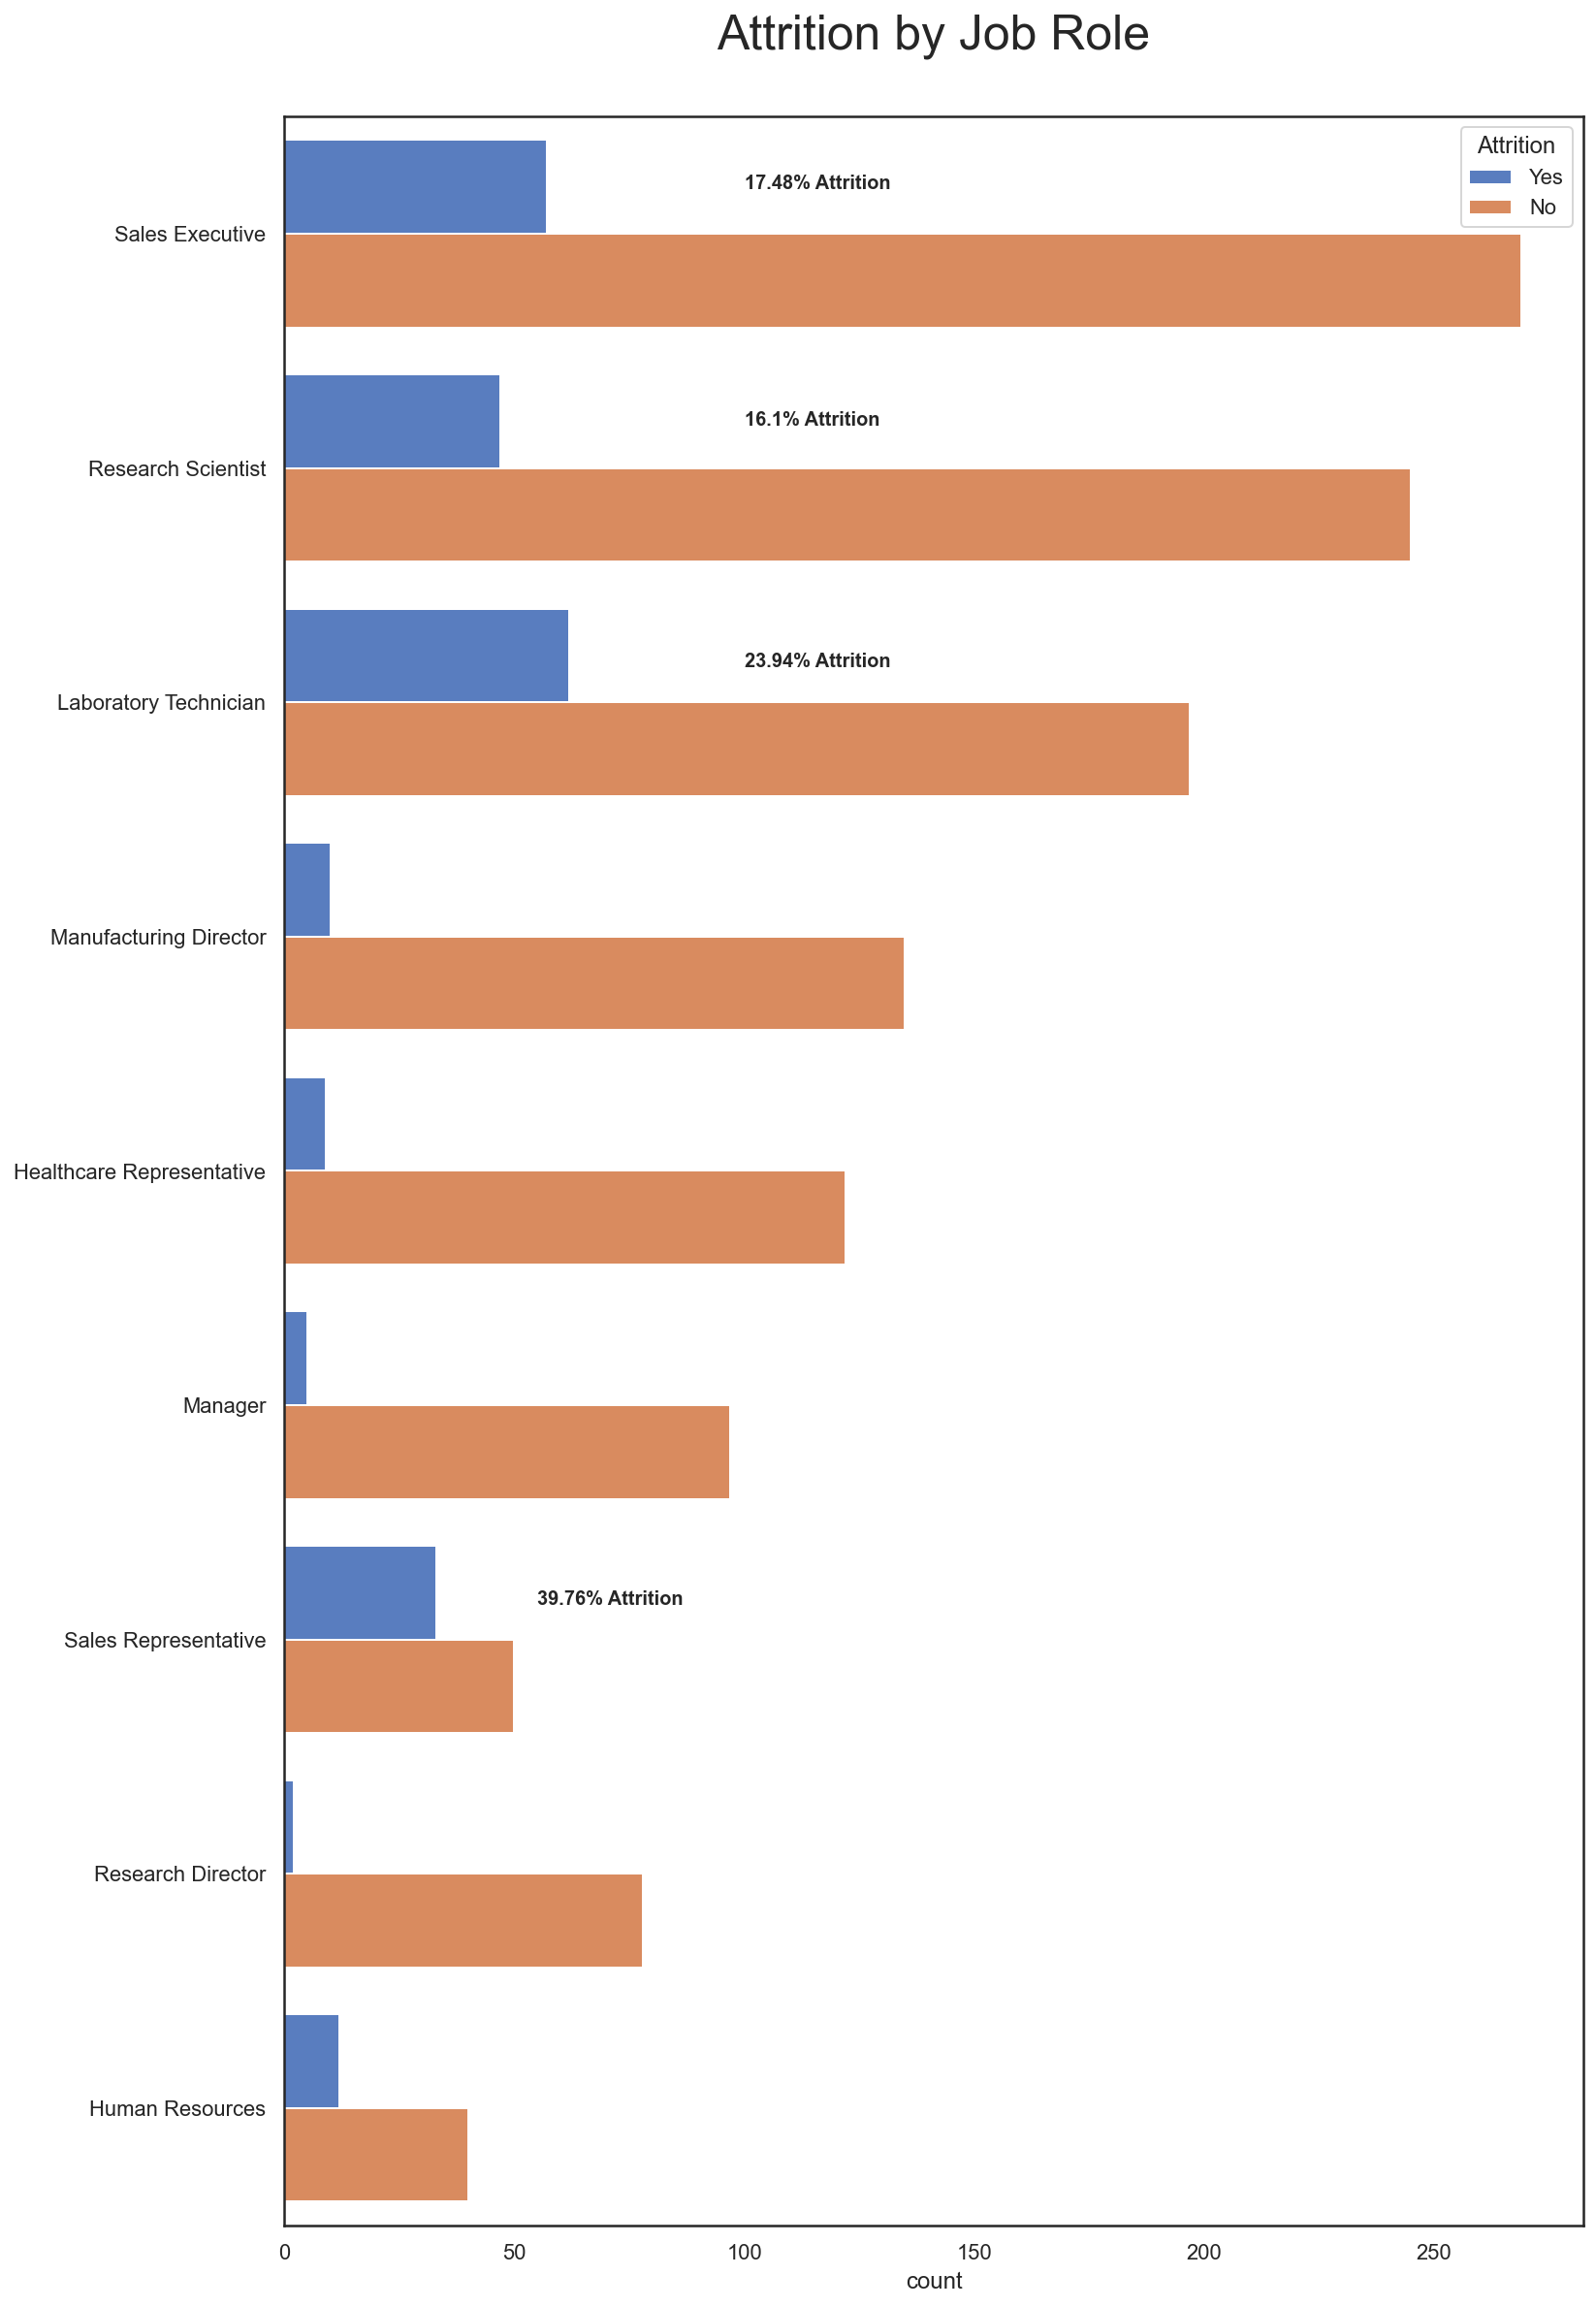

In [130]:
fig, ax = plt.subplots(1,1, figsize = (12, 20))

sns.countplot(data = NEW_data,
            y = "JobRole",
            hue = "Attrition",
            palette = "muted")

ax.set_title("Attrition by Job Role", pad = 35, fontsize = 25)
ax.set_ylabel(None)

def plot_per(column, label, x, y):
    string = np.str(np.round(percent_attrition(column, label),2)) + "% Attrition"
    plt.text(x = x, y = y, s = string, fontweight = "semibold")
    
plot_per("JobRole", "Sales Executive", 100, -0.19)
plot_per("JobRole", "Research Scientist", 100, .82)
plot_per("JobRole", "Laboratory Technician", 100, 1.85)

plot_per("JobRole", "Sales Representative", 55, 5.85)

above graph states that the job roles with the most attrition include Sales Representitive, Laboratory Technition,
Sales Executive, and Research Scientist.

The demographics of each of the job roles.

In [131]:
salesrep_df = NEW_data.loc[NEW_data.JobRole == "Sales Representative"]
lab_df = NEW_data.loc[NEW_data.JobRole == "Laboratory Technician"]
salesex_df = NEW_data.loc[NEW_data.JobRole == "Sales Executive"]
research_df = NEW_data.loc[NEW_data.JobRole == "Research Scientist"]

Text(0.5, 1.0, 'Age of Research Scientists')

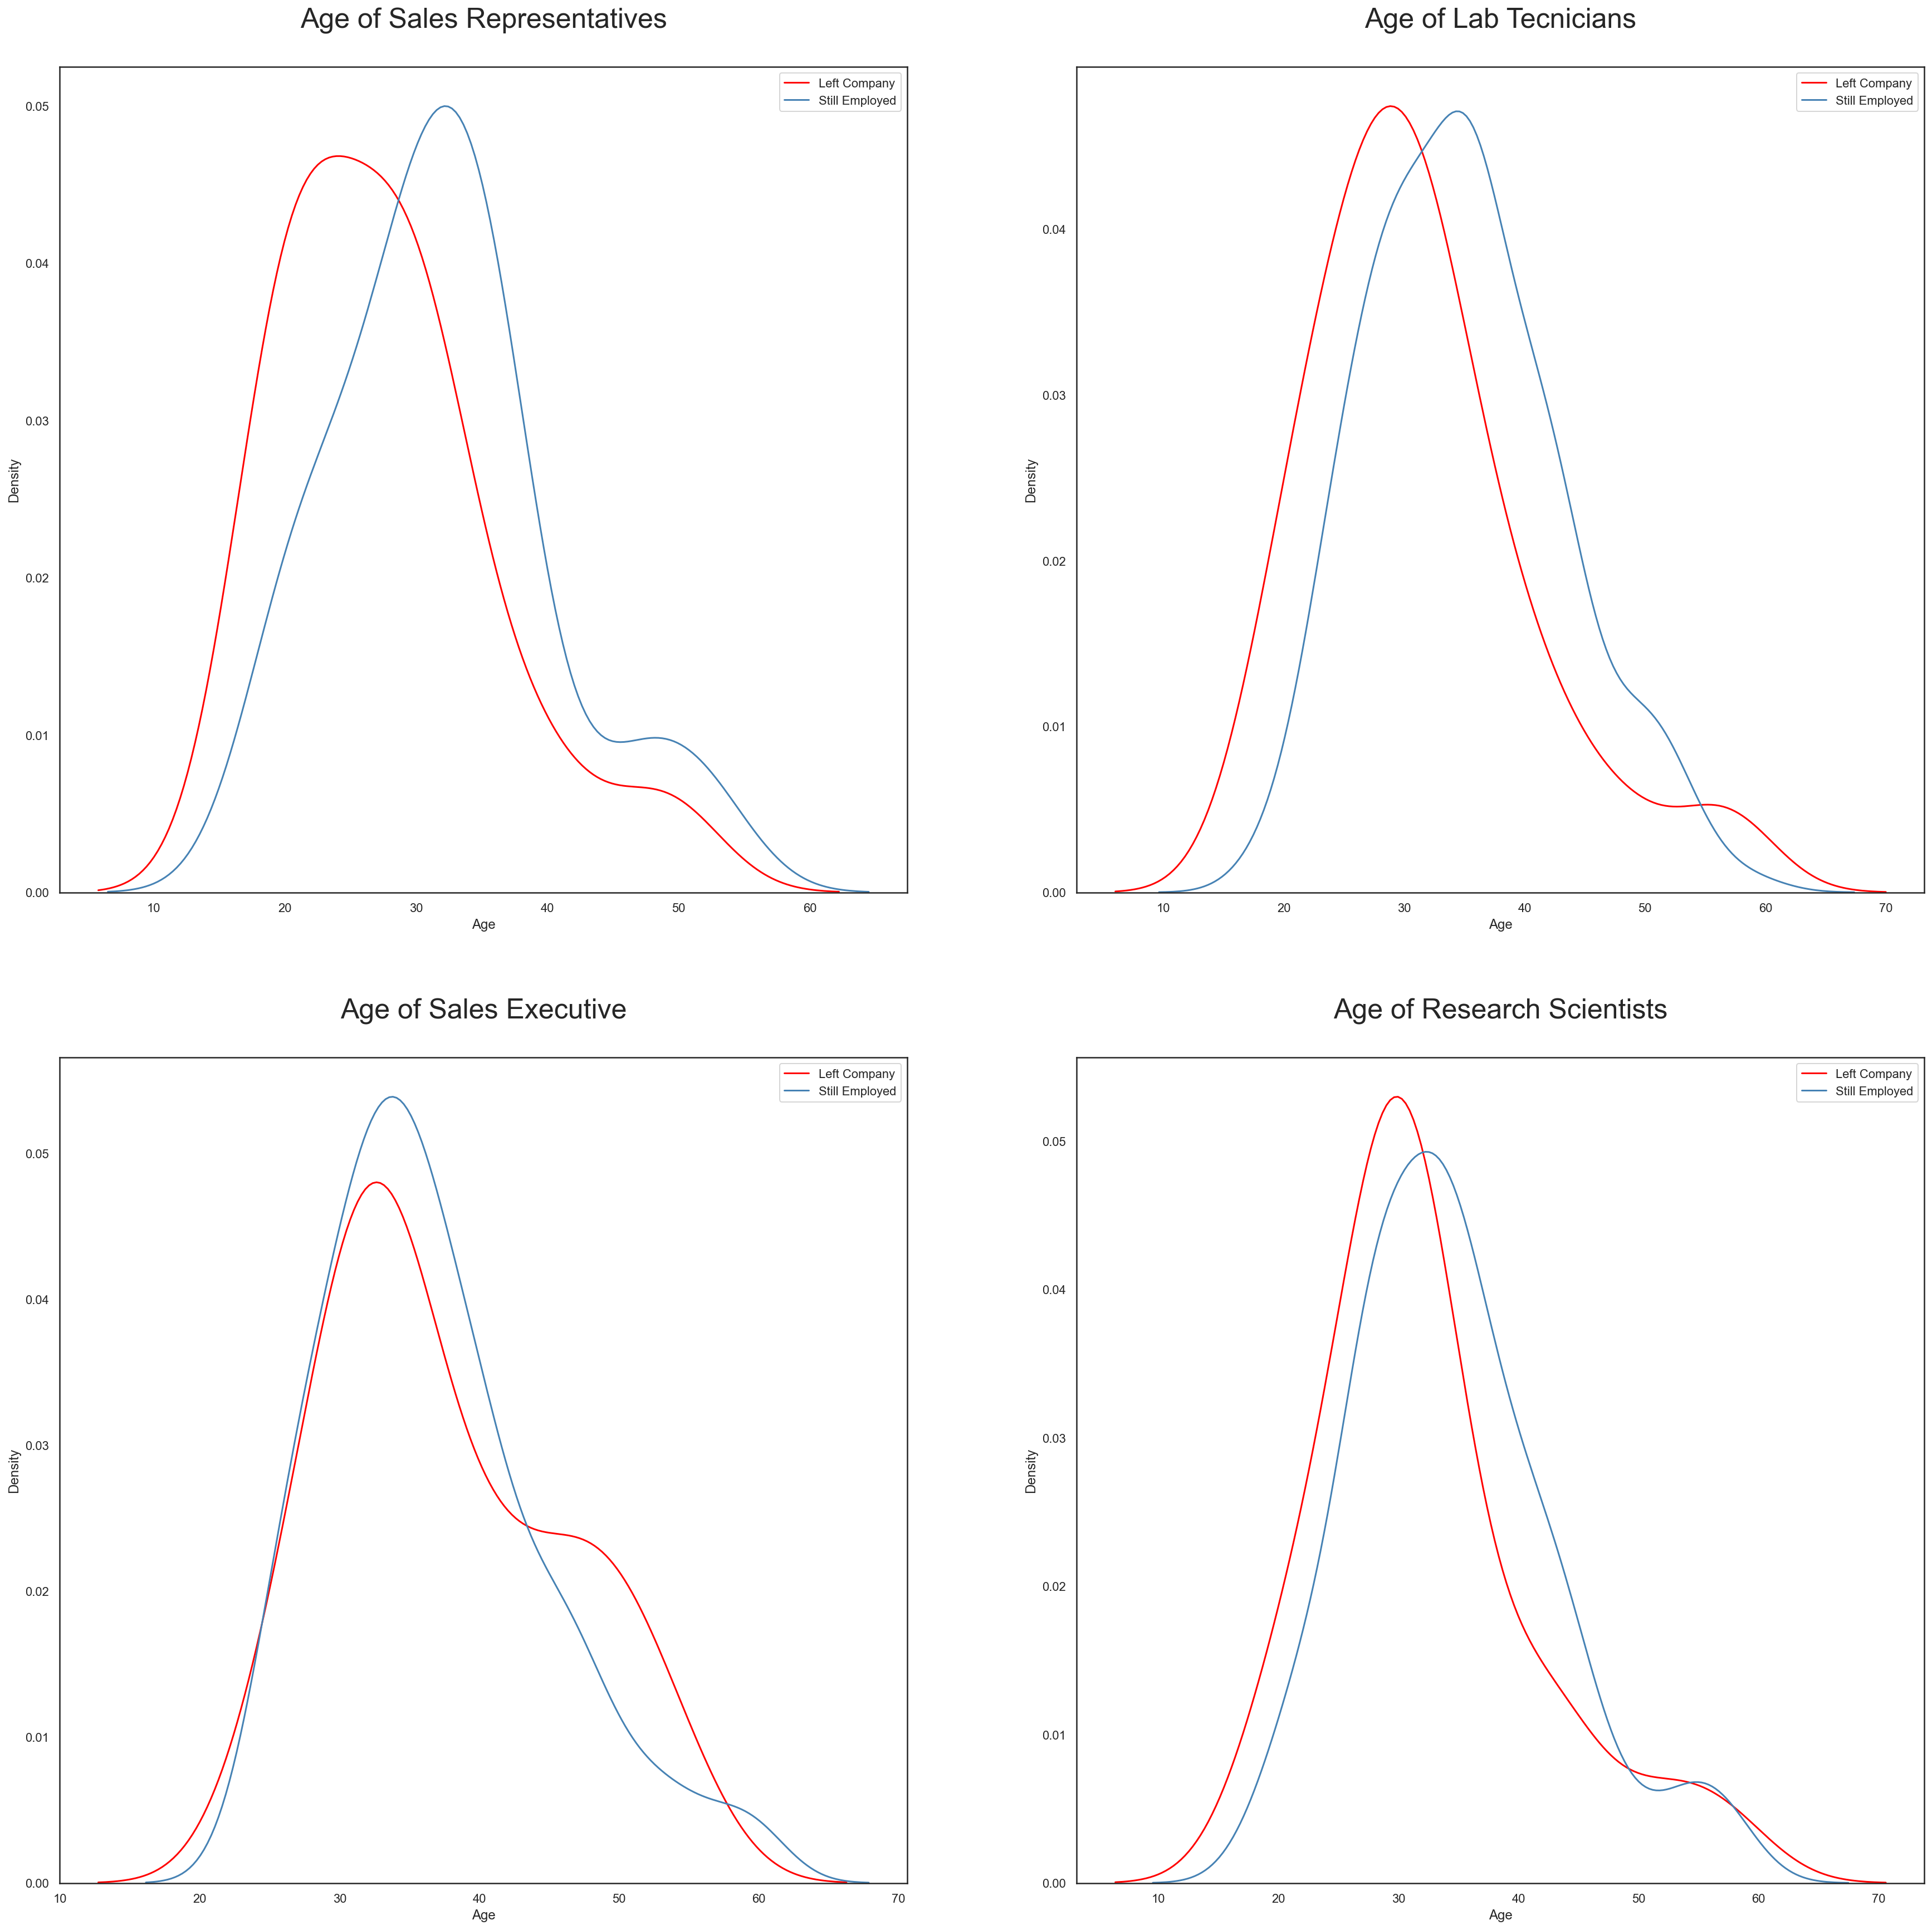

In [132]:
fig, ax = plt.subplots(2,2, figsize = (30,30))

sns.kdeplot(ax = ax[0,0], data = salesrep_df.loc[salesrep_df.Attrition == "Yes"],
                 x = "Age",
                label = "Left Company",
                color = "red")
sns.kdeplot(ax = ax[0,0], data = salesrep_df.loc[salesrep_df.Attrition == "No"],
                 x = "Age",
                label = "Still Employed",
                color = "steelblue")

ax[0,0].legend()
ax[0,0].set_title("Age of Sales Representatives", fontsize = 25, pad = 35)

sns.kdeplot(ax = ax[0,1], data = lab_df.loc[lab_df.Attrition == "Yes"],
                 x = "Age",
                label = "Left Company",
                color = "red")
sns.kdeplot(ax = ax[0,1], data = lab_df.loc[lab_df.Attrition == "No"],
                 x = "Age",
                label = "Still Employed",
                color = "steelblue")

ax[0,1].legend()
ax[0,1].set_title("Age of Lab Tecnicians", fontsize = 25, pad = 35)

sns.kdeplot(ax = ax[1,0], data = salesex_df.loc[salesex_df.Attrition == "Yes"],
                 x = "Age",
                label = "Left Company",
                color = "red")
sns.kdeplot(ax = ax[1,0], data = salesex_df.loc[salesex_df.Attrition == "No"],
                 x = "Age",
                label = "Still Employed",
                color = "steelblue")

ax[1,0].legend()
ax[1,0].set_title("Age of Sales Executive", fontsize = 25, pad = 35)

sns.kdeplot(ax = ax[1,1], data = research_df.loc[research_df.Attrition == "Yes"],
                 x = "Age",
                label = "Left Company",
                color = "red")
sns.kdeplot(ax = ax[1,1], data = research_df.loc[research_df.Attrition == "No"],
                 x = "Age",
                label = "Still Employed",
                color = "steelblue")

ax[1,1].legend()
ax[1,1].set_title("Age of Research Scientists", fontsize = 25, pad = 35)

from above observations, who leave the company are young in comparison to those who are still employed. The only exception is in the Sales Excecutive category where we see a large density of 50-60 year olds leaving the company.

In [133]:
print("Total number of Sales Executives that contribute to attrition: ", salesex_df.loc[salesex_df.Attrition == "Yes"].index.size)

Total number of Sales Executives that contribute to attrition:  57


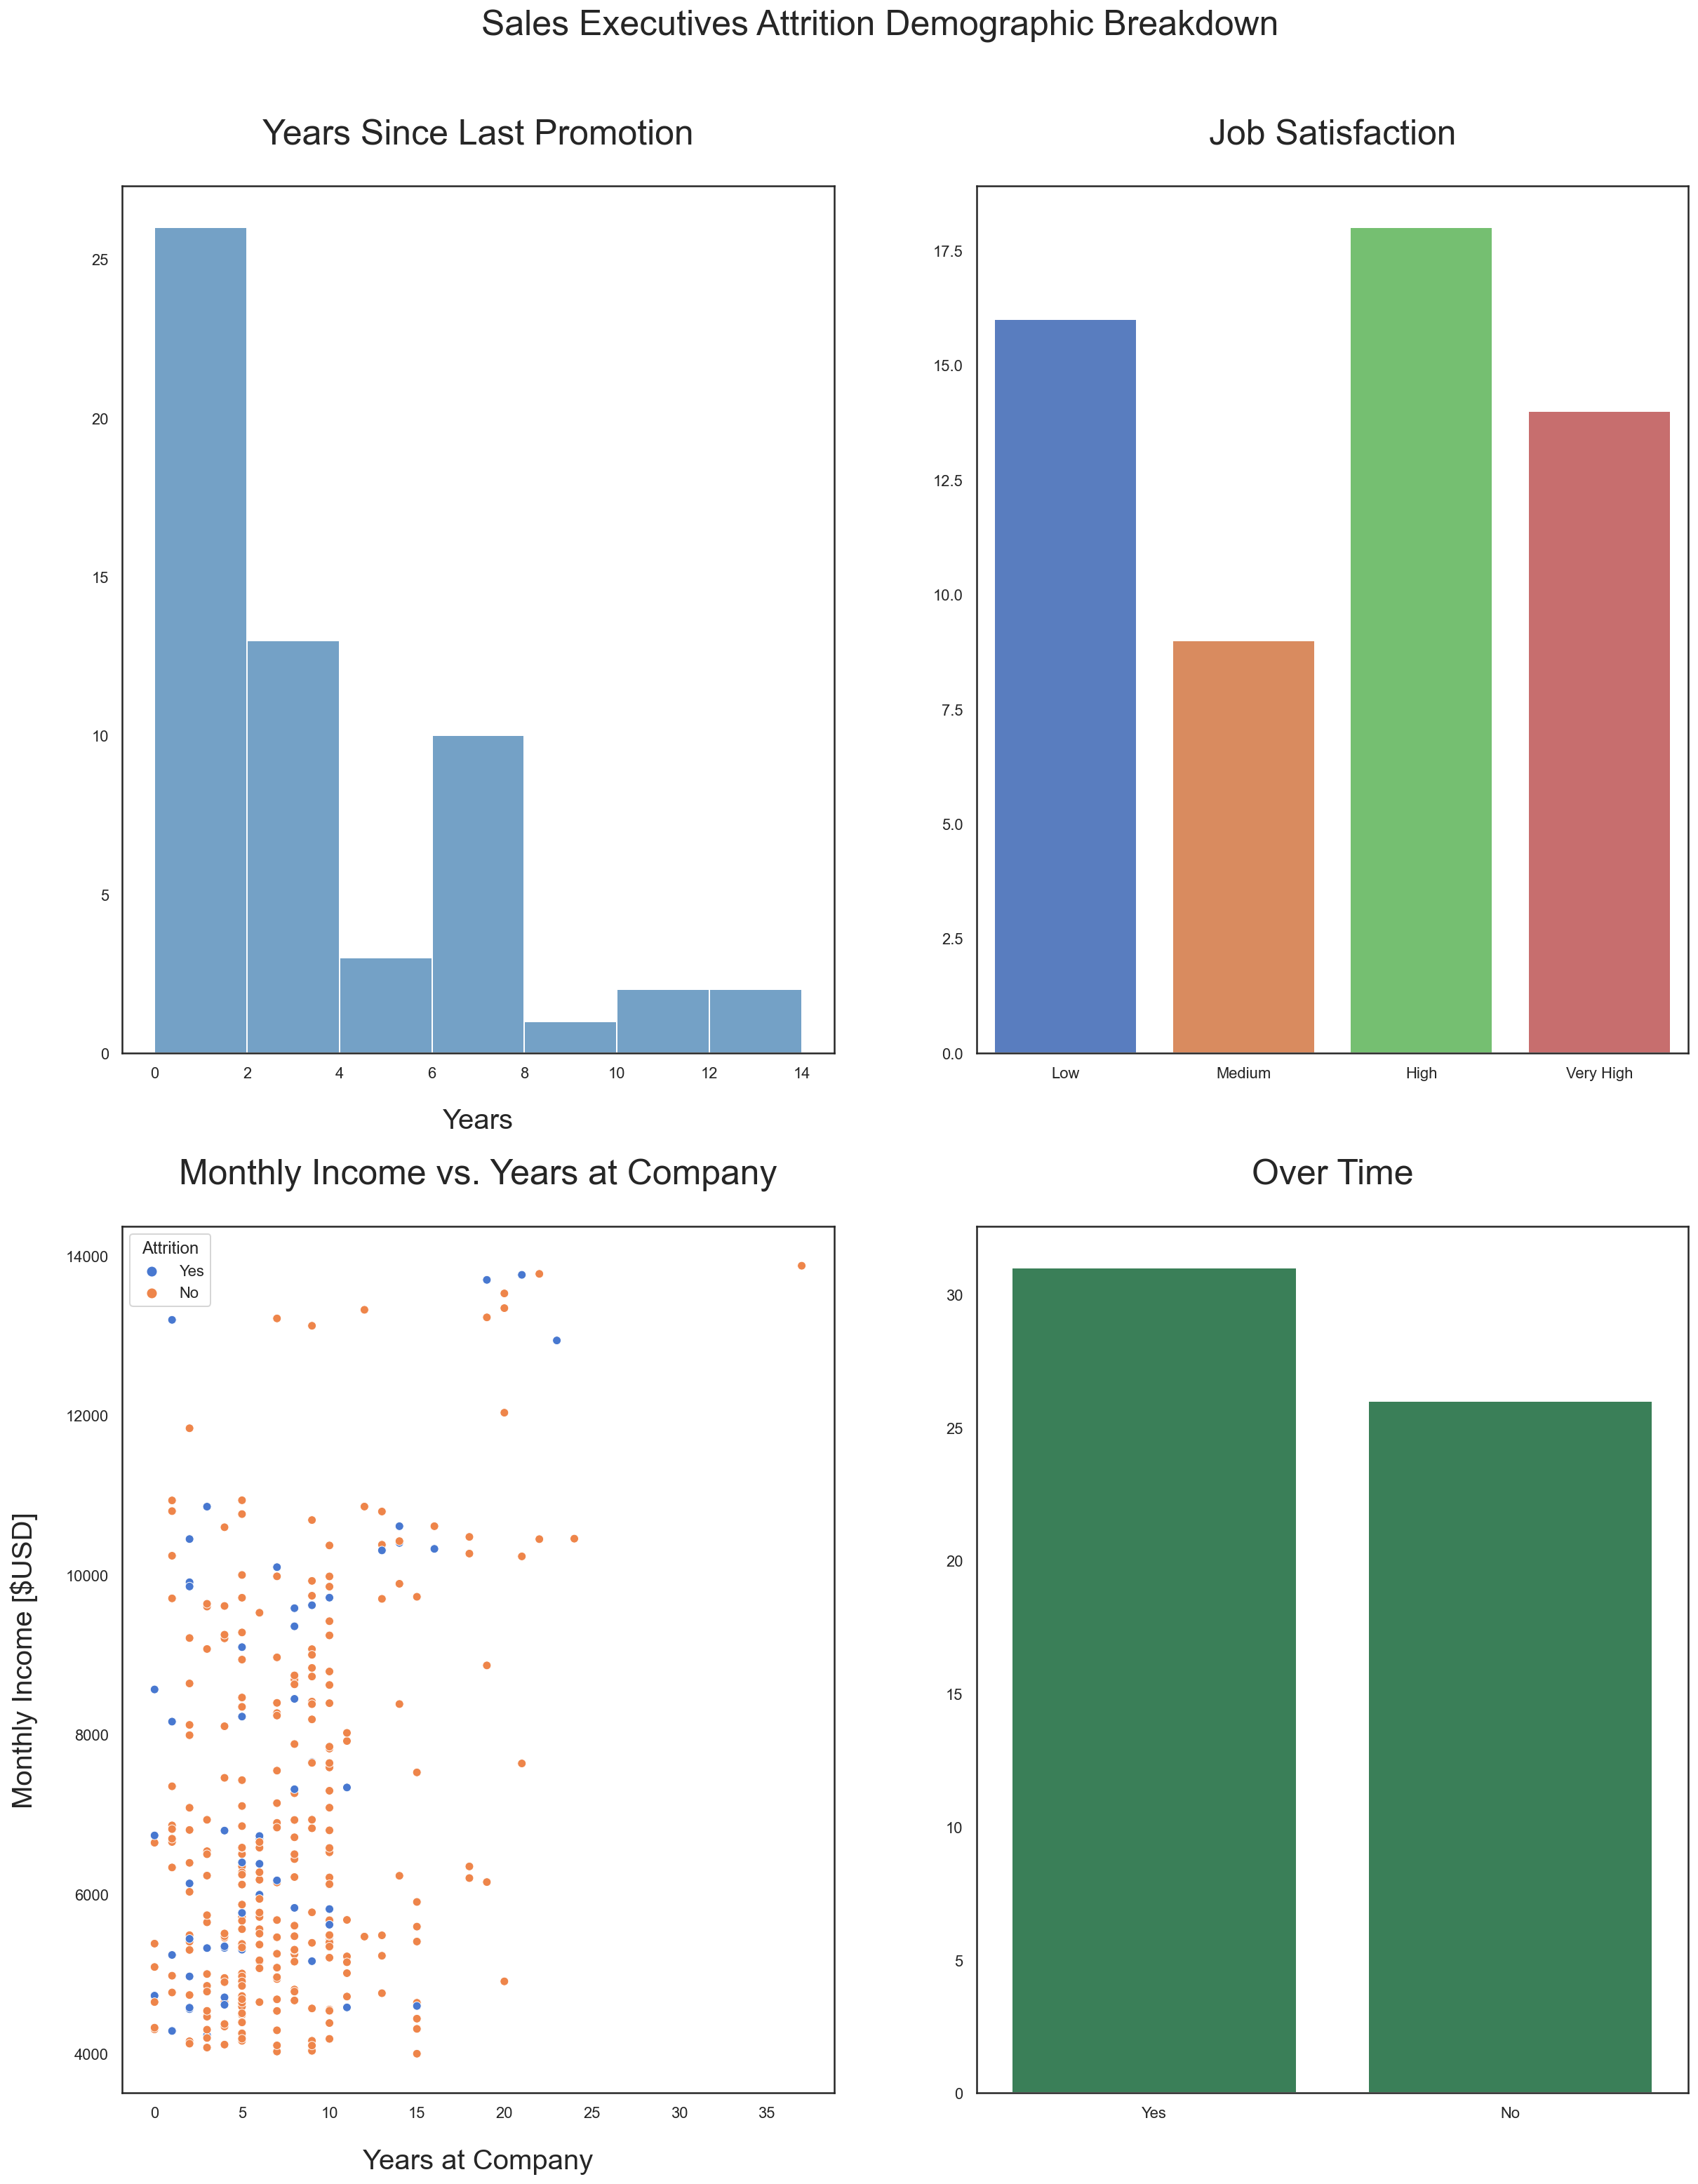

In [134]:
def Demographics(df, title):
    
    fig, ax = plt.subplots(2,2, figsize = (20,25))
    sns.histplot(ax = ax[0,0], data = df.loc[df.Attrition == "Yes"],
                     x = "YearsSinceLastPromotion",
                     color = "steelblue")
    sns.countplot(ax = ax[0,1], data = df.loc[df.Attrition == "Yes"],
                 x = "JobSatisfaction",
                 order = ["Low", "Medium", "High", "Very High"],
                 palette = "muted")
    sns.scatterplot(ax = ax[1,0], data = df,
               y = "MonthlyIncome",
               x = "YearsAtCompany",
               hue = "Attrition",
               hue_order = ["Yes", "No"],
               palette = "muted")
    sns.countplot(ax = ax[1,1], data = df.loc[df.Attrition == "Yes"],
                     x = "OverTime",
                     order = ["Yes", "No"],
                     color = "seagreen")

    fig.suptitle(title, fontsize = 25, y = 0.95)

    def axis_titles(ax, title, x, y):
        ax.set_title(title, fontsize = 25, pad = 30)
        ax.set_xlabel(x, fontsize = 20, labelpad = 20)
        ax.set_ylabel(y, fontsize = 20, labelpad = 20)
        
    axis_titles(ax[0,0], "Years Since Last Promotion", "Years", None)
    axis_titles(ax[0,1], "Job Satisfaction", None, None)
    axis_titles(ax[1,0], "Monthly Income vs. Years at Company", "Years at Company", "Monthly Income [$USD]")
    axis_titles(ax[1,1], "Over Time", None, None)

Demographics(salesex_df, "Sales Executives Attrition Demographic Breakdown")

one possibility for attrition from Sales Executives is low job satisfaction. There doesn't seem to be a correlation between attrition and low pay and long tenure. Many of the sales executives who leave the company have only gone a few years without promotion so that doesn't seem to be a likely reason. Interestingly, a majority of sales executives who leave the company work over time. This could also be a reason for attrition.

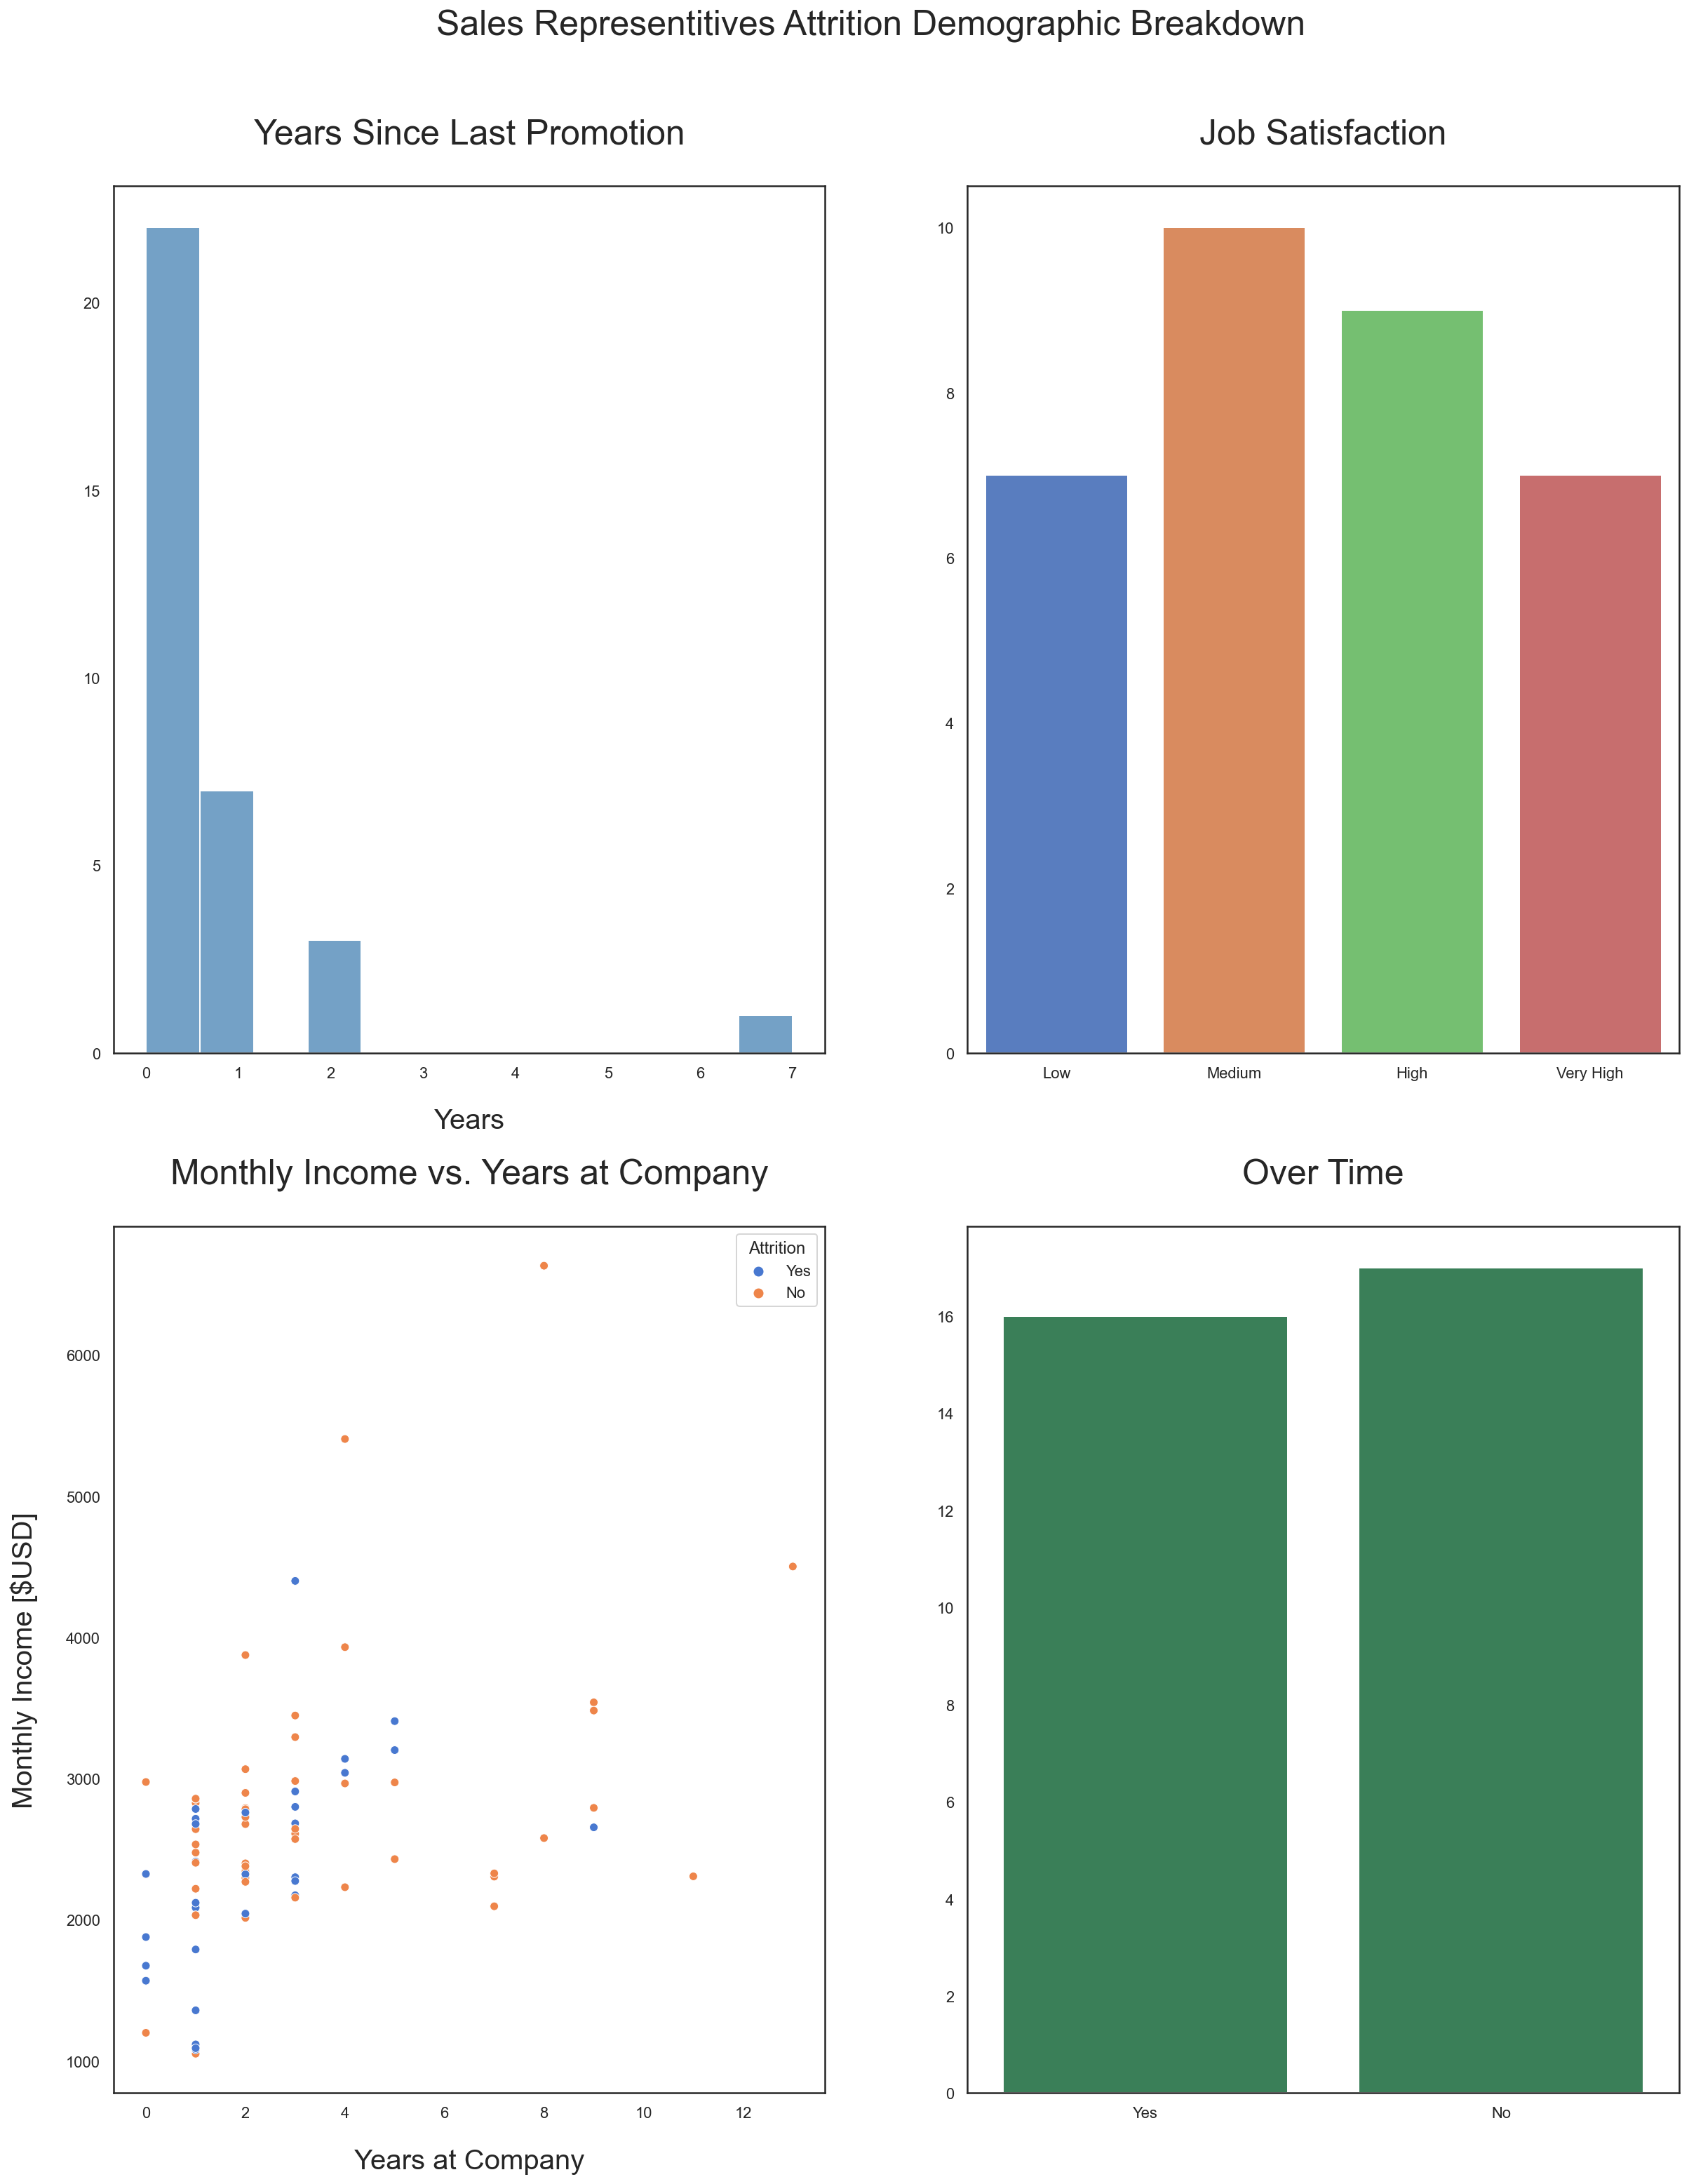

In [135]:
Demographics(salesrep_df, "Sales Representitives Attrition Demographic Breakdown")

Factors for attrition here are difficult to determine. We do see a large amount of low job satisfaction ratings, however that is expected of all employees who leave the company. Further analysis into this group may be required.

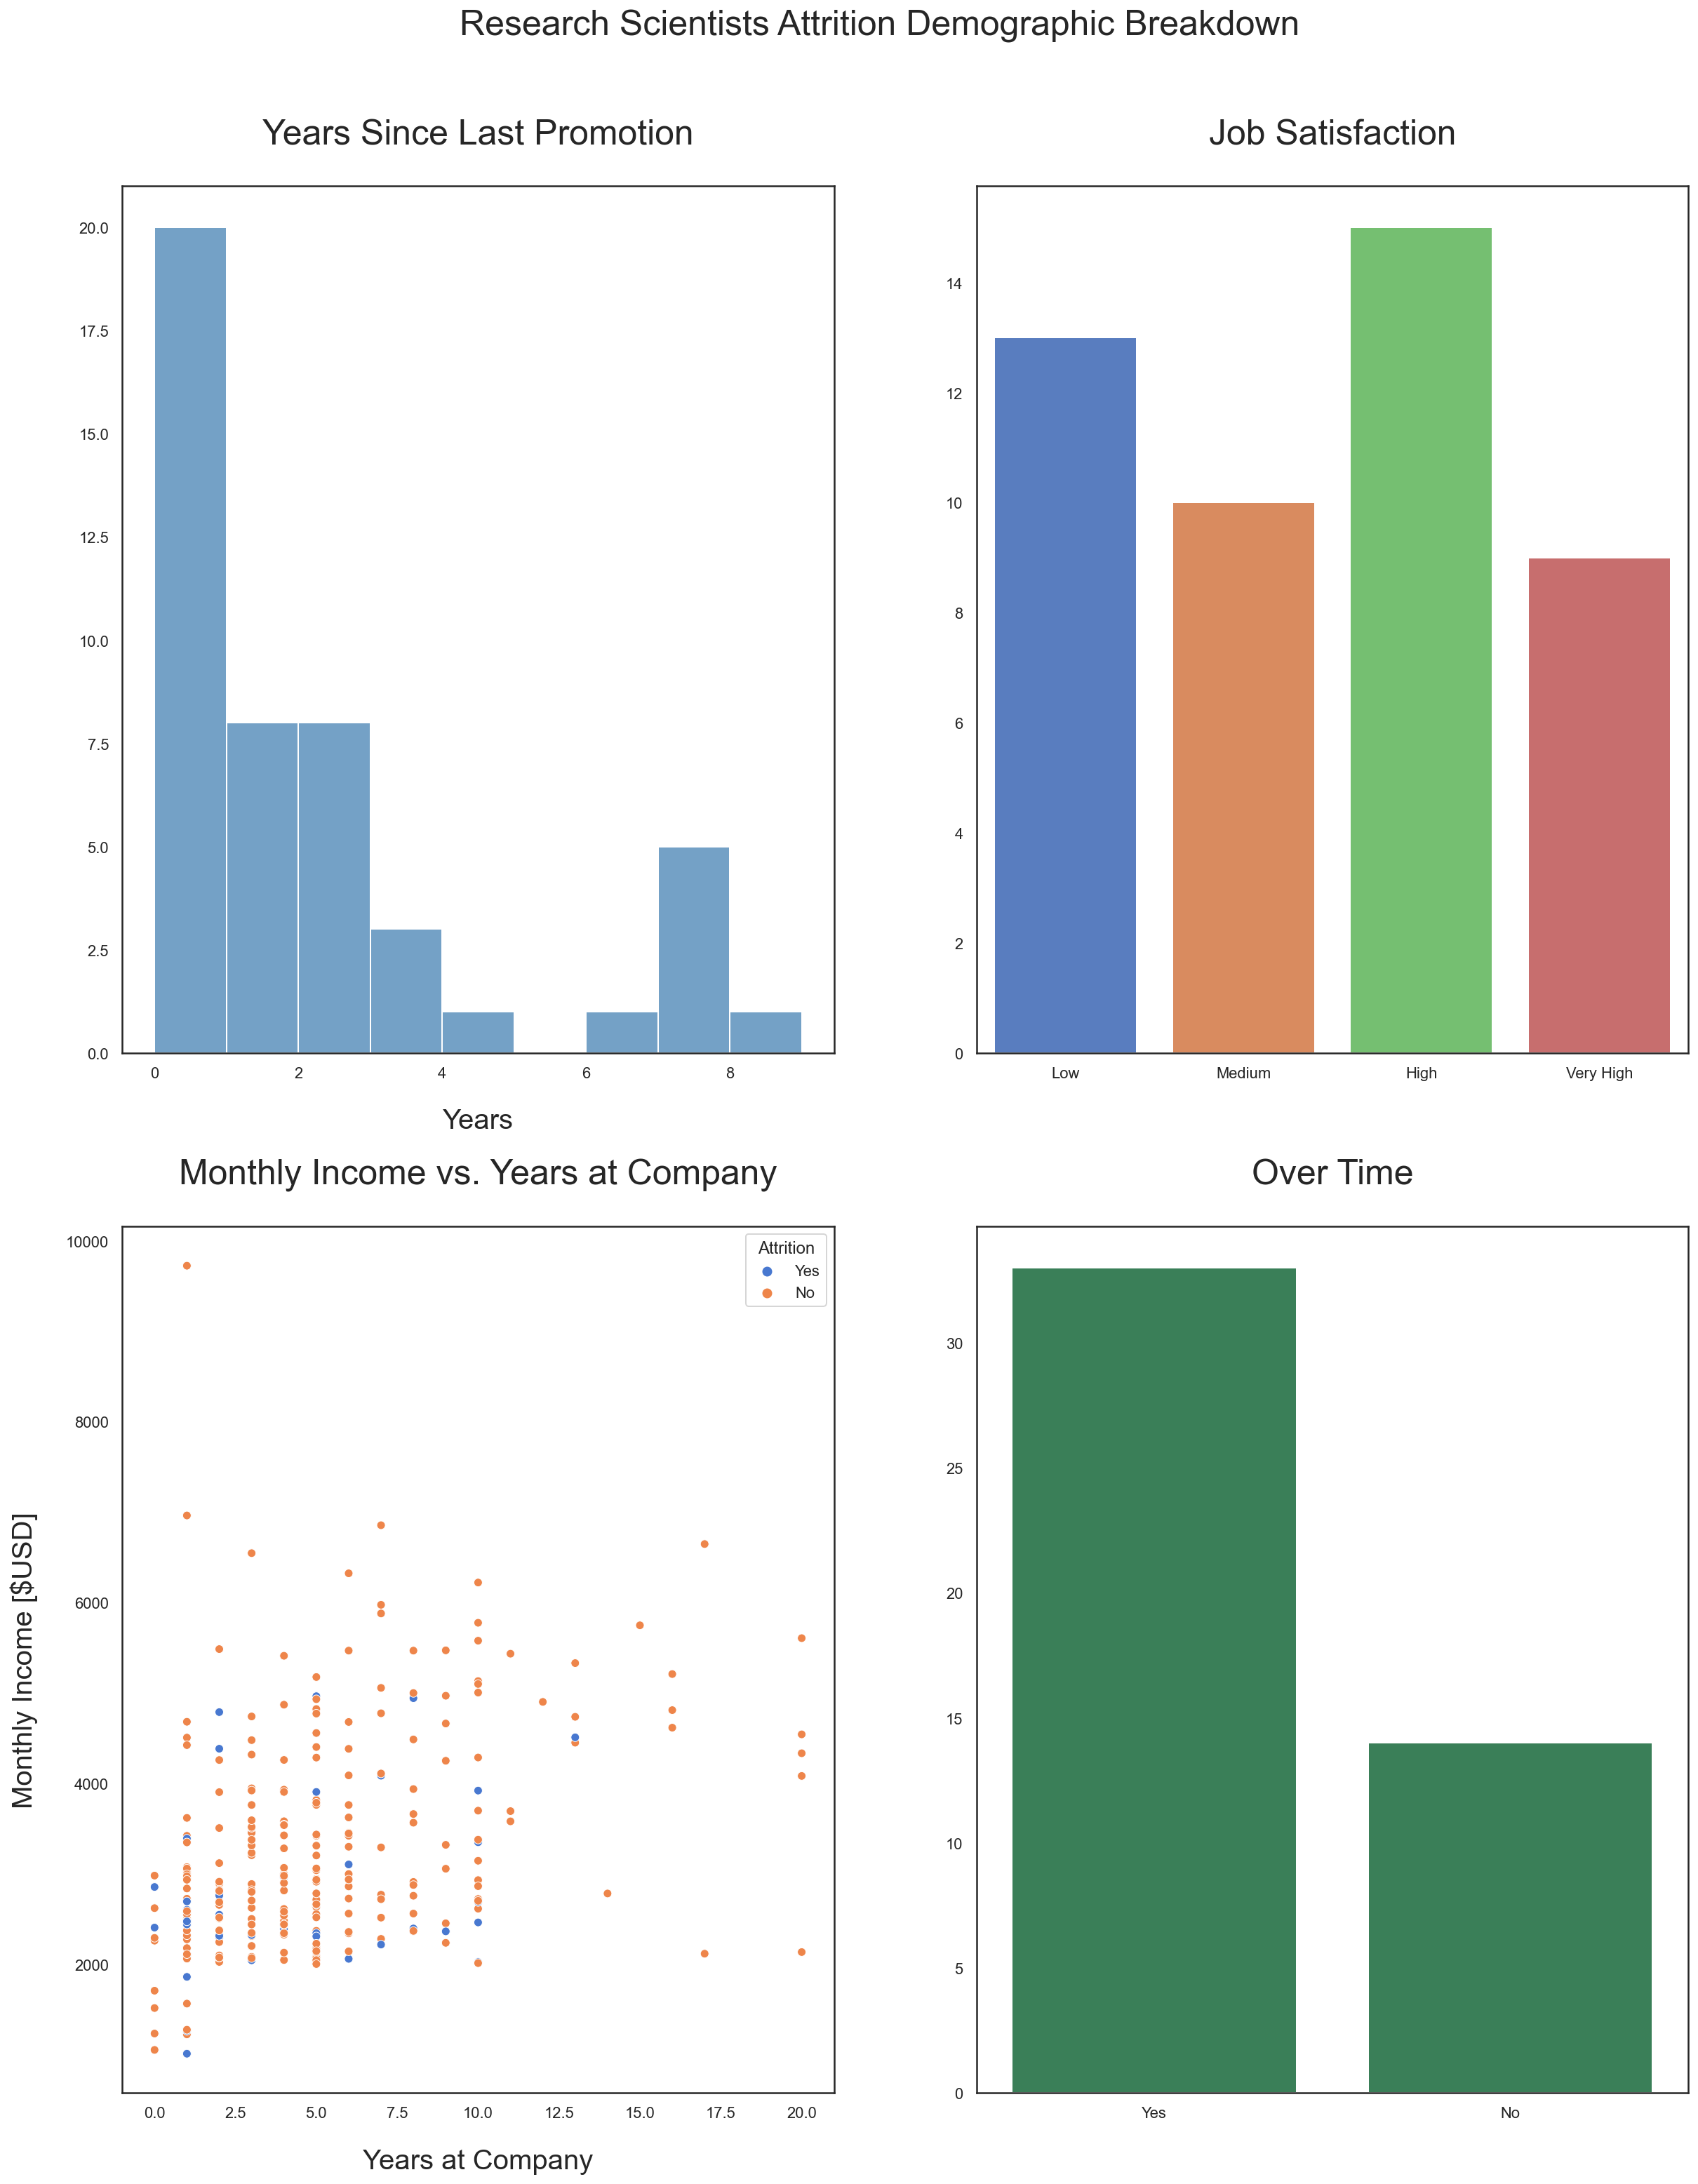

In [136]:
Demographics(research_df, "Research Scientists Attrition Demographic Breakdown")

For research scientists it is very apparent that many who leave the company have worked over time. and also observe that many have gone between 3-5 years without a promotion. Both of these could be factors into attrition.

Conclusions:

From above observations, four job roles within the company that have the highest percentages of attrition. The factors that may have attributed to attrition have been detailed above.


A few courses of action for this company to take include


Focus on employees within the Sales department working over time and those with low job satisfaction ratings

Focus on employees with a longer distance from home, they might be susceptible to attrition

Many sales executives that leave the company are older (~50 years), focus on this group and their role within the company

Many Research Scientists that leave the company work overtime, focus on those working over time to make sure they are not burning out